# Desarrollo de un análisis para clasificar emociones en la red social Twitter
#### Librerías usadas en este proyecto:


In [109]:
import tweepy
import json
import re
import emoji
from emoji import unicode_codes
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import csv
import spacy

#### Autenticación para acceder a la API de Twitter:

In [110]:
def auth(credenciales='credenciales.json'):
    
    creds = read(credenciales)
    key, secrets = creds['api_key'], creds['api_secrets']
    tk, tk_secrets = creds['access_token'], creds['access_secret']
 
    auth = tweepy.OAuthHandler(key,secrets)
    auth.set_access_token(tk,tk_secrets)
 
    api = tweepy.API(auth)
    return api

#Leyendo el archivo JSON para cargar las credenciales
def read(filename):

    with open(filename) as f:
        credenciales = json.load(f)
    return credenciales
 
if __name__ == '__main__':
    credenciales = 'credenciales.json'
    api = auth(credenciales)

#### Paso 1: Extraer y Cargar la Data

In [111]:
key_word = input ('Inserte aqui el tema que desea buscar: ')
filter_rt = "-filter:retweets"
tweet_limit= int(input ('Inserte aqui cuantos tweets desea buscar: '))

tweets = tweepy.Cursor(api.search_tweets, q = key_word + filter_rt, lang= "es", tweet_mode='extended').items(tweet_limit)

#Creando el DataFrame en donde los tweets recopilados se almacenaran
datos = []

for tweet in tweets:
    datos.append(tweet.full_text)

df = pd.DataFrame(datos, columns= ['Tweets'])
df.to_csv('prueba.csv', encoding="utf-8")
datos_csv = pd.read_csv('prueba.csv', index_col=[0])
datos_csv.head()


Inserte aqui el tema que desea buscar: Ucrania
Inserte aqui cuantos tweets desea buscar: 2000


,Tweets
0,Duro informe de Amnistía Internacional en Ucra...
1,Esta #noticia dolerá para el principal especta...
2,Continúan los asesinatos contra periodistas. L...
3,#Україна #Ukraine #Ucrania🇺🇦\nCuando digo que ...
4,"Juanelveguero, 07/05/22, 73° día de genocidio ..."


In [112]:
#Mostrando los tweets extraidos en tiempo real
strDatos = " ".join(datos)
text = strDatos
print(text)

Duro informe de Amnistía Internacional en Ucrania | Sobre lo ocurrido en Kiev https://t.co/1o1IHWVOv0 Esta #noticia dolerá para el principal espectador del “desfile de la victoria” del 9 de Mayo en Moscú 🇷🇺. El yate #Scheherazade sobre el que abundan indicios es / era propiedad de Putin… INCAUTADO para garantizar #indemnizaciones por la #Guerra Vs Ucrania 🇺🇦. https://t.co/lCjtJR8svH Continúan los asesinatos contra periodistas. Luis Enrique Ramírez fue asesinado en Sinaloa, con lo que la cifra de periodistas asesinados llega a 9 en este año 2022, empatando a Ucrania… sí así de peligroso es ejercer el periodismo en nuestro País… #Україна #Ukraine #Ucrania🇺🇦
Cuando digo que pasan cosas raras en #Rusia,
nadie me lo cree pero pasan cosas raras!🔥✌️🇦🇷
Imágenes de esta noche en #Kursk, #Russia 
#UkraineRussiaWar 
#PutinWarCrimes https://t.co/5M6EQgPmii Juanelveguero, 07/05/22, 73° día de genocidio continuado de Putin en Ucrania:

✓ Geoge Bush: "Tuve el honor esta mañana de pasar unos minutos h

#### Paso 2: Limpiar la Data 

In [113]:
#Filtrado de URLs, caracteres especiales, tildes, signos de puntuacion, numeros 0-9, emojis y stopwords
apattern= "[á]"
epattern= "[é]"
ipattern= "[í]"
opattern= "[ó]"
upattern= "[ú]"
stopwordsList = stopwords.words("Spanish") + stopwords.words("English")

new_text = re.sub(r'(@[a-zA-Z0-9-_.]+)|(\w+:\/\/\S+)|(\d+)|([^áéíóúñ0-9A-Za-z \t])',u'', text)
filtro0 = re.sub(apattern,"a", new_text)
filtro1 = re.sub(epattern,"e", filtro0)
filtro2 = re.sub(ipattern,"i", filtro1)
filtro3 = re.sub(opattern,"o", filtro2)
filtro4 = re.sub(upattern,"u", filtro3)
filtro5 = [palabra for palabra in word_tokenize(str.lower(filtro4)) if palabra not in stopwordsList]
strFiltro = u" ".join(filtro5)
print (strFiltro)

duro informe amnistia internacional ucrania ocurrido kiev noticia dolera principal espectador desfile victoria mayo moscu yate scheherazade abundan indicios propiedad putin incautado garantizar indemnizaciones guerra vs ucrania continuan asesinatos periodistas luis enrique ramirez asesinado sinaloa cifra periodistas asesinados llega año empatando ucrania si asi peligroso ejercer periodismo pais ukraine ucraniacuando digo pasan cosas raras rusianadie cree pasan cosas rarasimagenes noche kursk russia ukrainerussiawar putinwarcrimes juanelveguero dia genocidio continuado putin ucrania geoge bush honor mañana pasar minutos hablando presidente zelenski winston churchill tiempo asegurado presidente estadounidense jajajaja ahora ucrania otan eeuu van echar culpa estan dia estupidez paises menos estudien trabajen dejen ser mantenido gobiernos logica creer gente comentarios ver alguna noticia da igual favor ra mas ruido haga defenderlo muerte asi seguidores rusos asesinan gente ucrania gratis d

#### Paso 3: Lematización

In [114]:
#Mostrando el lema o forma canonica, es decir, la raiz de cada la palabra
nlp = spacy.load(u"es_core_news_lg")

def lemmatizer(strFiltro):  
    doc = nlp(strFiltro)
    return ' '.join([word.lemma_ for word in doc])

print(lemmatizer(strFiltro))

duro informe amnistia internacional ucrania ocurrido kiev noticia dolero principal espectador desfile victoria mayo moscu yate scheherazade abundar indicio propiedad putin incautado garantizar indemnización guerra vs ucrania continuan asesinato periodista luis enrique ramirez asesinado sinaloa cifra periodista asesinado llegar año empatar ucrania si asi peligroso ejercer periodismo pais ukraine ucraniacuando decir pasar cosa rara rusianadie creer pasar cosa rarasimagén noche kursk russia ukrainerussiawar putinwarcrimes juanelveguero dia genocidio continuado putin ucrania geoge bush honor mañana pasar minuto hablar presidente zelenski winston churchill tiempo asegurado presidente estadounidense jajajaja ahora ucrania otan eeuu ir echar culpa estar dia estupidez país menos estudiar trabajar dejar ser mantener gobierno logico creer gente comentario ver alguno noticia dar igual favor ra mas ruido hacer defender él muerte asi seguidor ruso asesinar gente ucrania gratis desmentido eeuu dar i

#### Paso 4: Tokenización del Texto

In [115]:
#Mostrando el proceso para separar palabra por palabra
strFiltro_tokens = word_tokenize(lemmatizer(strFiltro))
strFiltro_tokens

['duro',
 'informe',
 'amnistia',
 'internacional',
 'ucrania',
 'ocurrido',
 'kiev',
 'noticia',
 'dolero',
 'principal',
 'espectador',
 'desfile',
 'victoria',
 'mayo',
 'moscu',
 'yate',
 'scheherazade',
 'abundar',
 'indicio',
 'propiedad',
 'putin',
 'incautado',
 'garantizar',
 'indemnización',
 'guerra',
 'vs',
 'ucrania',
 'continuan',
 'asesinato',
 'periodista',
 'luis',
 'enrique',
 'ramirez',
 'asesinado',
 'sinaloa',
 'cifra',
 'periodista',
 'asesinado',
 'llegar',
 'año',
 'empatar',
 'ucrania',
 'si',
 'asi',
 'peligroso',
 'ejercer',
 'periodismo',
 'pais',
 'ukraine',
 'ucraniacuando',
 'decir',
 'pasar',
 'cosa',
 'rara',
 'rusianadie',
 'creer',
 'pasar',
 'cosa',
 'rarasimagén',
 'noche',
 'kursk',
 'russia',
 'ukrainerussiawar',
 'putinwarcrimes',
 'juanelveguero',
 'dia',
 'genocidio',
 'continuado',
 'putin',
 'ucrania',
 'geoge',
 'bush',
 'honor',
 'mañana',
 'pasar',
 'minuto',
 'hablar',
 'presidente',
 'zelenski',
 'winston',
 'churchill',
 'tiempo',
 'ase

In [116]:
len(strFiltro_tokens)

28168

#### Paso 5: Frecuencia

In [183]:
#Mostrando cuales son las palabras que mas se repiten
from nltk.probability import FreqDist
fdist = FreqDist()

In [184]:
for words in strFiltro_tokens:
    fdist[words.lower()]+=1
fdist

FreqDist({'ucrania': 1675, 'rusia': 516, 'guerra': 470, 'ruso': 383, 'mas': 201, 'ucranio': 198, 'putin': 171, 'militar': 161, 'decir': 158, 'hacer': 152, ...})

In [185]:
fdist_top5 = fdist.most_common(5)
fdist_top5

[('ucrania', 1675),
 ('rusia', 516),
 ('guerra', 470),
 ('ruso', 383),
 ('mas', 201)]

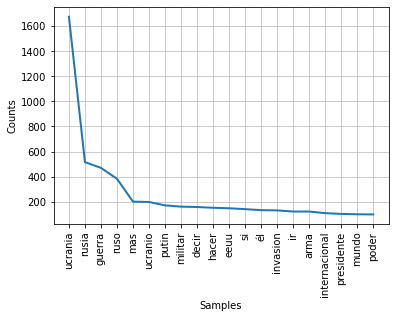

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [186]:
#Grafica de Frecuencia
freq = FreqDist(strFiltro_tokens)
freq.plot(20)

#### Paso 6: Tags del Texto

In [121]:
#Mostrando las etiquetas de cada palabra
for token in strFiltro_tokens:
    print(nltk.pos_tag([token]))

[('duro', 'NN')]
[('informe', 'NN')]
[('amnistia', 'NN')]
[('internacional', 'JJ')]
[('ucrania', 'NN')]
[('ocurrido', 'NN')]
[('kiev', 'NN')]
[('noticia', 'NN')]
[('dolero', 'NN')]
[('principal', 'NN')]
[('espectador', 'NN')]
[('desfile', 'NN')]
[('victoria', 'NNS')]
[('mayo', 'NN')]
[('moscu', 'NN')]
[('yate', 'NN')]
[('scheherazade', 'NN')]
[('abundar', 'NN')]
[('indicio', 'NN')]
[('propiedad', 'NN')]
[('putin', 'NN')]
[('incautado', 'NN')]
[('garantizar', 'NN')]
[('indemnización', 'NN')]
[('guerra', 'NN')]
[('vs', 'NN')]
[('ucrania', 'NN')]
[('continuan', 'NN')]
[('asesinato', 'NN')]
[('periodista', 'NN')]
[('luis', 'NN')]
[('enrique', 'NN')]
[('ramirez', 'NN')]
[('asesinado', 'NN')]
[('sinaloa', 'NN')]
[('cifra', 'NN')]
[('periodista', 'NN')]
[('asesinado', 'NN')]
[('llegar', 'NN')]
[('año', 'NN')]
[('empatar', 'NN')]
[('ucrania', 'NN')]
[('si', 'NN')]
[('asi', 'NN')]
[('peligroso', 'NN')]
[('ejercer', 'NN')]
[('periodismo', 'NN')]
[('pais', 'NN')]
[('ukraine', 'NN')]
[('ucraniacua

[('paz', 'NN')]
[('mundial', 'NN')]
[('cosa', 'NN')]
[('geopolitica', 'NN')]
[('putin', 'NN')]
[('guerrarusiaucrania', 'NN')]
[('zelensky', 'NN')]
[('usar', 'NN')]
[('alemania', 'NN')]
[('francia', 'NN')]
[('nato', 'NN')]
[('tarea', 'NN')]
[('presidente', 'NN')]
[('fin', 'NN')]
[('cabo', 'NN')]
[('hacer', 'NN')]
[('solo', 'NN')]
[('meter', 'NN')]
[('él', 'NN')]
[('sapo', 'NN')]
[('ucrania', 'NN')]
[('petro', 'NN')]
[('poder', 'NN')]
[('decir', 'NN')]
[('misa', 'NN')]
[('bandera', 'NN')]
[('ucranio', 'NN')]
[('fallar', 'NN')]
[('parte', 'NN')]
[('desaparecer', 'NN')]
[('ucrania', 'NN')]
[('creer', 'NN')]
[('nuevo', 'NN')]
[('paradigma', 'NN')]
[('socdad', 'NN')]
[('inicio', 'NN')]
[('covid', 'NN')]
[('preocupacion', 'NN')]
[('salud', 'NN')]
[('añadir', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('economico', 'NN')]
[('denominador', 'NN')]
[('comun', 'NN')]
[('incertidumbre', 'NN')]
[('mientras', 'NNS')]
[('estabilizar', 'NN')]
[('crecerir', 'NN')]
[('problema', 'NN')]
[('social', 'J

[('ucrania', 'NN')]
[('año', 'NN')]
[('donbass', 'NN')]
[('gente', 'NN')]
[('morir', 'NN')]
[('reportaje', 'NN')]
[('ultimo', 'NN')]
[('dia', 'NN')]
[('visitar', 'NN')]
[('bolivia', 'NN')]
[('canciller', 'NN')]
[('felix', 'NN')]
[('plasencia', 'NN')]
[('detallar', 'NN')]
[('temas', 'NN')]
[('tratar', 'NN')]
[('gobierno', 'NN')]
[('luis', 'NN')]
[('arce', 'NN')]
[('analizar', 'NN')]
[('conflicto', 'NN')]
[('ucrania', 'NN')]
[('sebastian', 'JJ')]
[('ochoa', 'NN')]
[('anuncio', 'NN')]
[('paquete', 'NN')]
[('asistencia', 'NN')]
[('seguridad', 'NN')]
[('proporcionar', 'NN')]
[('munición', 'NN')]
[('artillerio', 'NN')]
[('radar', 'NN')]
[('equipo', 'NN')]
[('adicional', 'JJ')]
[('ucrania', 'NN')]
[('decir', 'NN')]
[('joe', 'NN')]
[('biden', 'NN')]
[('ucrania', 'NN')]
[('pais', 'NN')]
[('muerto', 'NN')]
[('mider', 'NN')]
[('spiegel', 'NN')]
[('elimino', 'NN')]
[('video', 'NN')]
[('testimonio', 'NN')]
[('persona', 'NN')]
[('q', 'NN')]
[('salir', 'NN')]
[('planta', 'NN')]
[('siderurgica', 'NN')

[('acuerdo', 'NN')]
[('paz', 'NN')]
[('putin', 'NN')]
[('golpe', 'NN')]
[('demoledor', 'NN')]
[('putin', 'NN')]
[('ucrania', 'NN')]
[('dejar', 'NN')]
[('juego', 'NN')]
[('buque', 'NN')]
[('ruso', 'NN')]
[('mas', 'NN')]
[('moderno', 'NN')]
[('presidente', 'NN')]
[('polaco', 'NN')]
[('andrzej', 'NN')]
[('duda', 'NN')]
[('declarar', 'NN')]
[('discurso', 'NN')]
[('pronunciado', 'NN')]
[('varsovia', 'NN')]
[('celebrar', 'NN')]
[('dia', 'NN')]
[('diaspora', 'NNS')]
[('polaco', 'NN')]
[('futuro', 'NN')]
[('proximo', 'NN')]
[('habra', 'NN')]
[('fronteras', 'NNS')]
[('polonia', 'NN')]
[('ucrania', 'NN')]
[('mientras', 'NNS')]
[('preocupado', 'NN')]
[('ucrania', 'NN')]
[('pasar', 'NN')]
[('planear', 'NN')]
[('mas', 'NN')]
[('importante', 'NN')]
[('pasar', 'NN')]
[('cuba', 'NN')]
[('ucrania', 'NN')]
[('dar', 'NN')]
[('mas', 'NN')]
[('importancia', 'NN')]
[('hecho', 'NN')]
[('saber', 'NN')]
[('estar', 'NN')]
[('sufrir', 'NN')]
[('cordobés', 'NN')]
[('sucreño', 'NN')]
[('interés', 'NN')]
[('esconde

[('rusia', 'NN')]
[('poder', 'NN')]
[('ucrania', 'NN')]
[('ahora', 'NNS')]
[('pa', 'NN')]
[('declarar', 'NN')]
[('él', 'NN')]
[('guerra', 'NN')]
[('otan', 'NN')]
[('periodista', 'NN')]
[('italiano', 'NN')]
[('denunciar', 'NN')]
[('poco', 'NN')]
[('imparcialidad', 'NN')]
[('medio', 'NN')]
[('europeo', 'NN')]
[('conflicto', 'NN')]
[('ucrania', 'NN')]
[('rhee', 'NN')]
[('keun', 'NN')]
[('famoso', 'NN')]
[('youtuber', 'NN')]
[('coreano', 'NN')]
[('lider', 'NN')]
[('unidad', 'NN')]
[('fuerza', 'NN')]
[('especial', 'JJ')]
[('ucrania', 'NN')]
[('momento', 'NN')]
[('crtico', 'NN')]
[('rusia', 'NN')]
[('eeuu', 'NN')]
[('ucrania', 'NN')]
[('via', 'IN')]
[('alemania', 'NN')]
[('enviar', 'NN')]
[('armamento', 'NN')]
[('pesado', 'NN')]
[('aucrania', 'NN')]
[('habrar', 'NN')]
[('ver', 'NN')]
[('inna', 'NN')]
[('ver', 'NN')]
[('si', 'NN')]
[('entender', 'NN')]
[('rusia', 'NN')]
[('intervenir', 'NN')]
[('ucrania', 'NN')]
[('presidente', 'NN')]
[('unidos', 'NN')]
[('joe', 'NN')]
[('biden', 'NN')]
[('an

[('americana', 'NNS')]
[('soldado', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('chiste', 'NN')]
[('mas', 'NN')]
[('tranqui', 'NN')]
[('ucrania', 'NN')]
[('q', 'NN')]
[('alli', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('dar', 'NN')]
[('guerra', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('mantener', 'NN')]
[('elevado', 'NN')]
[('costo', 'NN')]
[('diesel', 'NN')]
[('canacar', 'NN')]
[('carestia', 'NN')]
[('hoy', 'NN')]
[('otan', 'NN')]
[('aplicar', 'NN')]
[('mismo', 'NN')]
[('tactica', 'NN')]
[('ucrania', 'NN')]
[('censurar', 'NN')]
[('medio', 'NN')]
[('afianzar', 'NN')]
[('propagandano', 'NN')]
[('dificil', 'NN')]
[('ver', 'NN')]
[('pasado', 'NN')]
[('entender', 'NN')]
[('futuro', 'NN')]
[('termino', 'NN')]
[('rebelde', 'NN')]
[('blanquear', 'NN')]
[('lunaticos', 'NN')]
[('corto', 'NN')]
[('cabeza', 'NN')]
[('armar', 'NN')]
[('entrenar', 'NN')]
[('tal', 'NN')]
[('blanquear', 'NN')]
[('facista', 'NN')]
[('ucrania', 'NN')]
[('rpd', 'NN')]
[('drón', 'NN')]
[('artillerio', 'NN')

[('ucranio', 'NN')]
[('escasez', 'NN')]
[('combustible', 'JJ')]
[('noticia', 'NN')]
[('mitad', 'NN')]
[('gasolinera', 'NN')]
[('pais', 'NN')]
[('estar', 'NN')]
[('operativo', 'NN')]
[('estar', 'NN')]
[('abierto', 'NN')]
[('registrar', 'NN')]
[('larga', 'NN')]
[('cola', 'NN')]
[('oficina', 'NN')]
[('alto', 'NN')]
[('comisionado', 'NN')]
[('recopilar', 'NN')]
[('informacion', 'NN')]
[('proximo', 'NN')]
[('informe', 'NN')]
[('mientras', 'NNS')]
[('comunidad', 'NN')]
[('internacional', 'JJ')]
[('pedir', 'NN')]
[('lider', 'NN')]
[('kremlin', 'NN')]
[('juzgado', 'NN')]
[('constante', 'NN')]
[('violación', 'NN')]
[('derecho', 'NN')]
[('inte', 'NN')]
[('ucrania', 'NN')]
[('bloguero', 'NN')]
[('sharii', 'NN')]
[('traidor', 'NN')]
[('odisidente', 'NN')]
[('ucrania', 'NN')]
[('reconocer', 'NN')]
[('negar', 'NN')]
[('responsabilidad', 'NN')]
[('aparente', 'NN')]
[('ataque', 'NN')]
[('ocurrido', 'NN')]
[('rusia', 'NN')]
[('rusia', 'NN')]
[('presentar', 'NN')]
[('onu', 'NN')]
[('prueba', 'NN')]
[('c

[('peluso', 'NN')]
[('serbio', 'NN')]
[('hacer', 'NN')]
[('pensar', 'NN')]
[('ucrania', 'NN')]
[('hundido', 'NN')]
[('barco', 'NN')]
[('esperar', 'NN')]
[('veras', 'NNS')]
[('manco', 'NN')]
[('ah', 'NN')]
[('ucrania', 'NN')]
[('dentro', 'NN')]
[('mejor', 'NN')]
[('ejercito', 'NN')]
[('mundo', 'NN')]
[('poco', 'NN')]
[('cosa', 'NN')]
[('canciller', 'NN')]
[('aleman', 'NN')]
[('olaf', 'NN')]
[('scholz', 'NN')]
[('putin', 'NN')]
[('deber', 'NN')]
[('ganar', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('ir', 'NN')]
[('ganar', 'NN')]
[('tampoco', 'NN')]
[('si', 'NN')]
[('salir', 'NN')]
[('existir', 'NN')]
[('amenazo', 'NN')]
[('cao', 'NN')]
[('internacional', 'JJ')]
[('solo', 'NN')]
[('rusia', 'NN')]
[('deber', 'NN')]
[('seguir', 'NN')]
[('imponer', 'NN')]
[('él', 'NN')]
[('nota', 'NN')]
[('desesperacion', 'NN')]
[('declaración', 'NN')]
[('decir', 'NN')]
[('ucrania', 'NN')]
[('hablar', 'NN')]
[('solo', 'NN')]
[('bot', 'NN')]
[('tarifado', 'NN')]
[('regimen', 'NNS')]
[('criminal', 'JJ')]


[('falta', 'NN')]
[('informacion', 'NN')]
[('analisis', 'NN')]
[('producto', 'NN')]
[('bien', 'NN')]
[('cultivado', 'NN')]
[('ignorancio', 'NN')]
[('situacion', 'NN')]
[('mundial', 'NN')]
[('producto', 'NN')]
[('pandemia', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('dejar', 'NN')]
[('dos', 'NN')]
[('ejemplo', 'NN')]
[('inflacion', 'NN')]
[('usar', 'NN')]
[('rusia', 'NN')]
[('estudiar', 'NN')]
[('hacer', 'NN')]
[('daño', 'NN')]
[('hacer', 'NN')]
[('delfín', 'NN')]
[('alrededor', 'NN')]
[('base', 'NN')]
[('naval', 'NN')]
[('ruso', 'NN')]
[('via', 'IN')]
[('onu', 'NN')]
[('elevar', 'NN')]
[('civil', 'JJ')]
[('muerto', 'NN')]
[('invasion', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('niño', 'NN')]
[('consideración', 'NN')]
[('caso', 'NN')]
[('guerra', 'NN')]
[('rusoucranián', 'NN')]
[('actor', 'NN')]
[('principal', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('actor', 'NN')]
[('segundario', 'NN')]
[('otan', 'NN')]
[('ue', 'NN')]
[('usar', 'NN')]
[('china', 'NN')]
[('putin', 'NN')]

[('establecer', 'NN')]
[('mundo', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('comunicación', 'NN')]
[('ruso', 'NN')]
[('ser', 'NN')]
[('desastroso', 'NN')]
[('unidad', 'NN')]
[('usar', 'NN')]
[('viejo', 'NN')]
[('maquina', 'NN')]
[('cifrado', 'NN')]
[('guerra', 'NN')]
[('frio', 'NN')]
[('similar', 'JJ')]
[('enigma', 'NN')]
[('alemán', 'NN')]
[('sistema', 'NN')]
[('lento', 'NN')]
[('vulnerable', 'JJ')]
[('militar', 'NN')]
[('ruso', 'NN')]
[('pasar', 'NN')]
[('usar', 'NN')]
[('radio', 'NN')]
[('ucranio', 'NN')]
[('escuchar', 'NN')]
[('propio', 'NN')]
[('movil', 'NN')]
[('oligarca', 'NN')]
[('critico', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('mirar', 'NN')]
[('putin', 'NN')]
[('ucrania', 'NN')]
[('denunciar', 'NN')]
[('mitad', 'NN')]
[('territorio', 'NN')]
[('minado', 'NN')]
[('millón', 'NN')]
[('razón', 'NN')]
[('zelenskyy', 'NN')]
[('seguir', 'NN')]
[('adelante', 'NN')]
[('saqueo', 'NN')]
[('propio', 'NN')]
[('pueblorecordemos', 'NN')]
[('arma', 'NN')]
[('llegar', 'NN')]
[('o

[('arma', 'NN')]
[('prohibido', 'NN')]
[('irpin', 'NN')]
[('parte', 'NN')]
[('ruso', 'NN')]
[('ver', 'NN')]
[('destruccion', 'NN')]
[('ucrania', 'NN')]
[('solo', 'NN')]
[('q', 'NN')]
[('caso', 'NN')]
[('guerra', 'NN')]
[('comunismo', 'NN')]
[('ver', 'NN')]
[('rostro', 'NN')]
[('parecer', 'NN')]
[('año', 'NN')]
[('asi', 'NN')]
[('rusia', 'NN')]
[('biden', 'NN')]
[('dandole', 'NN')]
[('mano', 'NN')]
[('hitler', 'NN')]
[('invisible', 'JJ')]
[('boris', 'NN')]
[('johnson', 'NN')]
[('mas', 'NN')]
[('despeinado', 'NN')]
[('nunca', 'NN')]
[('primero', 'NN')]
[('ministro', 'NN')]
[('aleman', 'NN')]
[('mandar', 'NN')]
[('armamento', 'NN')]
[('segundo', 'NN')]
[('guerra', 'NN')]
[('mundial', 'NN')]
[('ucrania', 'NN')]
[('municiones', 'NNS')]
[('estar', 'NN')]
[('loquito', 'NN')]
[('realmente', 'NN')]
[('amenza', 'NN')]
[('mundo', 'NN')]
[('nazismo', 'NN')]
[('fallido', 'NN')]
[('ucrania', 'NN')]
[('motolitos', 'NNS')]
[('polonia', 'NN')]
[('conspirador', 'NN')]
[('fascista', 'NN')]
[('eeuu', 'NN'

[('frontera', 'NN')]
[('ucrania', 'NN')]
[('dar', 'NN')]
[('cuenta', 'NN')]
[('decir', 'NN')]
[('falta', 'NN')]
[('esi', 'NN')]
[('equivaler', 'NN')]
[('papa', 'NN')]
[('pidio', 'NN')]
[('ayuno', 'NN')]
[('tema', 'NN')]
[('guerra', 'NN')]
[('ucraniarusio', 'NN')]
[('gran', 'NN')]
[('solucion', 'NN')]
[('dar', 'NN')]
[('internacional', 'JJ')]
[('rusia', 'NN')]
[('decir', 'NN')]
[('evacuado', 'NN')]
[('civil', 'JJ')]
[('planta', 'NN')]
[('azovstalamplia', 'NNS')]
[('informacion', 'NN')]
[('aqui', 'NN')]
[('noticierovv', 'NN')]
[('may', 'MD')]
[('rusia', 'NN')]
[('serar', 'NN')]
[('responsable', 'JJ')]
[('agresion', 'NN')]
[('brutal', 'NN')]
[('viola', 'NN')]
[('ley', 'NN')]
[('internacional', 'JJ')]
[('ucrania', 'NN')]
[('declarar', 'NN')]
[('ministra', 'NN')]
[('relaciones', 'NNS')]
[('exteriores', 'NNS')]
[('suecia', 'NN')]
[('ann', 'NN')]
[('linde', 'NN')]
[('aqui', 'NN')]
[('cuba', 'NN')]
[('acusar', 'NN')]
[('unidos', 'NN')]
[('democracia', 'NN')]
[('desinformacion', 'NN')]
[('cuba'

[('jefe', 'NN')]
[('final', 'JJ')]
[('consiguio', 'NN')]
[('escapar', 'NN')]
[('lviv', 'NN')]
[('primero', 'NN')]
[('defender', 'NN')]
[('contenido', 'NN')]
[('periodistico', 'NN')]
[('pago', 'NN')]
[('igual', 'JJ')]
[('tema', 'NN')]
[('habria', 'NN')]
[('liberar', 'NN')]
[('ir', 'NN')]
[('enlace', 'NN')]
[('hola', 'NN')]
[('suscriptores', 'NNS')]
[('continuacion', 'NN')]
[('cierto', 'NN')]
[('detalle', 'NN')]
[('temo', 'NN')]
[('merecer', 'NN')]
[('pena', 'NN')]
[('compartir', 'NN')]
[('creer', 'NN')]
[('largo', 'NN')]
[('tú', 'NN')]
[('verar', 'NN')]
[('biden', 'NN')]
[('anunciar', 'NN')]
[('millón', 'NN')]
[('dolar', 'NN')]
[('ayuda', 'NN')]
[('militar', 'NN')]
[('paraucranio', 'NN')]
[('dsde', 'NN')]
[('principio', 'NN')]
[('dciamos', 'NN')]
[('hacer', 'NN')]
[('tiempoeste', 'NN')]
[('hario', 'NN')]
[('bueno', 'NN')]
[('zpes', 'NNS')]
[('malvado', 'NN')]
[('él', 'NN')]
[('cargado', 'NN')]
[('psoeno', 'NN')]
[('djado', 'NN')]
[('institucion', 'NN')]
[('dgradartraicionar', 'NN')]
[('

[('aliento', 'NN')]
[('saber', 'NN')]
[('guerra', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('ir', 'NN')]
[('estallar', 'NN')]
[('despues', 'NNS')]
[('conteniamos', 'NN')]
[('aliento', 'NN')]
[('otrosvimos', 'NNS')]
[('separacion', 'NN')]
[('donbass', 'NN')]
[('votacion', 'NN')]
[('historica', 'NN')]
[('crimea', 'NN')]
[('regresar', 'NN')]
[('territorio', 'NN')]
[('rusovimos', 'NN')]
[('maidan', 'NN')]
[('hombre', 'NN')]
[('chocolate', 'NN')]
[('salir', 'NN')]
[('victorioso', 'NN')]
[('ser', 'NN')]
[('presidente', 'NN')]
[('ucrania', 'NN')]
[('año', 'NN')]
[('verdaderamente', 'NN')]
[('seguir', 'NN')]
[('noticia', 'NN')]
[('ver', 'NN')]
[('escapar', 'NN')]
[('policia', 'NN')]
[('ofrecer', 'NN')]
[('santo', 'NN')]
[('rosario', 'NN')]
[('anuestro', 'NN')]
[('señor', 'NN')]
[('jesuspor', 'NN')]
[('paises', 'NNS')]
[('venezuela', 'NN')]
[('nicaragua', 'NN')]
[('argentinachile', 'NN')]
[('españa', 'NN')]
[('colombiamexico', 'NN')]
[('siria', 'NNS')]
[('peruecuador', 'NN')]
[('brasil', '

[('ucraniano', 'NN')]
[('presidente', 'NN')]
[('putin', 'NN')]
[('ukraine', 'NN')]
[('hoy', 'NN')]
[('otan', 'NN')]
[('aplicar', 'NN')]
[('mismo', 'NN')]
[('tactica', 'NN')]
[('ucrania', 'NN')]
[('censurar', 'NN')]
[('medio', 'NN')]
[('afianzar', 'NN')]
[('propaganda', 'NN')]
[('guerra', 'NN')]
[('ucraniarusio', 'NN')]
[('bryansk', 'NN')]
[('km', 'NN')]
[('frontera', 'NN')]
[('ucrania', 'NN')]
[('dos', 'NN')]
[('tanque', 'NN')]
[('petroleo', 'NN')]
[('ser', 'NN')]
[('bombardeadosforman', 'NN')]
[('partir', 'NN')]
[('sistema', 'NN')]
[('oleoducto', 'NN')]
[('druzhba', 'NN')]
[('termino', 'NN')]
[('rebeldes', 'NNS')]
[('blanquear', 'NN')]
[('lunaticos', 'NN')]
[('corto', 'NN')]
[('cabeza', 'NN')]
[('armar', 'NN')]
[('entrenar', 'NN')]
[('tal', 'NN')]
[('blanquear', 'NN')]
[('facista', 'NN')]
[('ucrania', 'NN')]
[('rusia', 'NN')]
[('afirmar', 'NN')]
[('ucrania', 'NN')]
[('utilizado', 'NN')]
[('magia', 'NN')]
[('negro', 'NN')]
[('guerra', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[(

[('intervenir', 'NN')]
[('ahora', 'NNS')]
[('ucrania', 'NN')]
[('ver', 'NN')]
[('complicado', 'NN')]
[('intervendra', 'NN')]
[('biden', 'NN')]
[('decir', 'NN')]
[('casi', 'NN')]
[('agotado', 'NN')]
[('financiamiento', 'NN')]
[('poder', 'NN')]
[('usar', 'NN')]
[('proporcionar', 'NN')]
[('él', 'NN')]
[('ayuda', 'NN')]
[('militar', 'NN')]
[('ucranio', 'NN')]
[('sitio', 'NN')]
[('web', 'NN')]
[('facebook', 'NN')]
[('telegram', 'NN')]
[('instagram', 'NN')]
[('deberiar', 'NN')]
[('hacer', 'NN')]
[('proyecto', 'NN')]
[('ley', 'NN')]
[('tipificar', 'NN')]
[('socialismo', 'NN')]
[('delito', 'NN')]
[('estafapaises', 'NNS')]
[('prohibido', 'NN')]
[('comunismo', 'NN')]
[('poloniaucrania', 'NN')]
[('lituania', 'NN')]
[('georgiachequia', 'NN')]
[('letonia', 'NN')]
[('eslovaquia', 'NN')]
[('paises', 'NNS')]
[('sufrir', 'NN')]
[('reducido', 'NN')]
[('pobreza', 'NN')]
[('entoncesencubahayunadictadurar', 'NN')]
[('may', 'MD')]
[('segun', 'NN')]
[('onu', 'NN')]
[('numero', 'NN')]
[('civil', 'JJ')]
[('mue

[('ucrania', 'NN')]
[('realmente', 'NN')]
[('hdkp', 'NN')]
[('putin', 'NN')]
[('reconfortar', 'NN')]
[('ver', 'NN')]
[('patriotismo', 'NN')]
[('ucraniano', 'NN')]
[('resilencia', 'NN')]
[('catrehpto', 'NN')]
[('interesado', 'NN')]
[('pasar', 'NN')]
[('ucrania', 'NN')]
[('china', 'NN')]
[('provenir', 'NN')]
[('maldito', 'NN')]
[('pandemia', 'NN')]
[('mortal', 'NN')]
[('rusia', 'NN')]
[('provenir', 'NN')]
[('inesperado', 'NN')]
[('guerra', 'NN')]
[('atacar', 'NN')]
[('ucrania', 'NN')]
[('venezuela', 'NN')]
[('provenir', 'NN')]
[('ciento', 'NN')]
[('inmigrante', 'NN')]
[('escapar', 'NN')]
[('regimen', 'NNS')]
[('dictaduro', 'NN')]
[('hacia', 'NN')]
[('mundooh', 'NN')]
[('causalidad', 'NN')]
[('si', 'NN')]
[('país', 'NN')]
[('regimen', 'NNS')]
[('comunista', 'NN')]
[('mientras', 'NNS')]
[('departamento', 'NN')]
[('estar', 'NN')]
[('secuestrado', 'NN')]
[('x', 'NN')]
[('clan', 'NN')]
[('golfo', 'NN')]
[('intervenir', 'NN')]
[('expresar', 'NN')]
[('solidaridad', 'NN')]
[('ucranio', 'NN')]
[(

[('putin', 'NN')]
[('amenazar', 'NN')]
[('ataque', 'NN')]
[('relampago', 'NN')]
[('cualquiera', 'NN')]
[('injerencia', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('papa', 'NN')]
[('decir', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('amenazar', 'NN')]
[('mundo', 'NN')]
[('entero', 'NN')]
[('reivindicar', 'NN')]
[('papel', 'NN')]
[('cristianismo', 'NN')]
[('paz', 'NN')]
[('euvzla', 'NN')]
[('internacional', 'JJ')]
[('ver', 'NN')]
[('si', 'NN')]
[('entender', 'NN')]
[('culpable', 'JJ')]
[('putin', 'NN')]
[('invadir', 'NN')]
[('destruir', 'NN')]
[('ucranio', 'NN')]
[('administracion', 'NN')]
[('europeo', 'NN')]
[('hacer', 'NN')]
[('europa', 'NN')]
[('dependiente', 'NN')]
[('gas', 'NN')]
[('rusoentonz', 'NN')]
[('culpable', 'JJ')]
[('apoyar', 'NN')]
[('defender', 'NN')]
[('invasion', 'NN')]
[('destruccion', 'NN')]
[('genocidio', 'NN')]
[('cometido', 'NN')]
[('rusia', 'NN')]
[('imaginate', 'NN')]
[('violencia', 'NN')]
[('asustar', 'NN')]
[('todavia', 'NN')]
[('entero', 'NN')]
[('gue

[('petroleo', 'NN')]
[('ucrania', 'NN')]
[('si', 'NN')]
[('profesor', 'NN')]
[('filosofia', 'NN')]
[('ruso', 'NN')]
[('hacer', 'NN')]
[('coctel', 'NN')]
[('molotov', 'NN')]
[('ukraine', 'NN')]
[('ucrania', 'NN')]
[('putinwarcriminal', 'NN')]
[('crimea', 'NN')]
[('tenia', 'NN')]
[('mas', 'NN')]
[('año', 'NN')]
[('pertenencer', 'NN')]
[('rusia', 'NN')]
[('solo', 'NN')]
[('ser', 'NN')]
[('parte', 'NN')]
[('ucranio', 'NN')]
[('adivín', 'NN')]
[('nacionalidad', 'NN')]
[('sentian', 'JJ')]
[('mas', 'NN')]
[('identificado', 'NN')]
[('habitante', 'NN')]
[('adivina', 'NN')]
[('hacer', 'NN')]
[('referendum', 'NN')]
[('pedir', 'NN')]
[('estar', 'NN')]
[('pasar', 'NN')]
[('momento', 'NN')]
[('peligroso', 'NN')]
[('causar', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('rusia', 'NN')]
[('parar', 'NN')]
[('señor', 'NN')]
[('guardar', 'NN')]
[('suplir', 'NN')]
[('necesidad', 'NN')]
[('diario', 'NN')]
[('familia', 'NNS')]
[('lugar', 'NN')]
[('llegar', 'NN')]
[('paz', 'NN')]
[('armonio', 'NN')]
[('com

[('petroleo', 'NN')]
[('gas', 'NN')]
[('acero', 'NN')]
[('etcsigue', 'NN')]
[('tocar', 'NN')]
[('cerca', 'NN')]
[('doloroso', 'NN')]
[('ver', 'NN')]
[('gente', 'NN')]
[('pasar', 'NN')]
[('rien', 'NN')]
[('gozar', 'NN')]
[('humor', 'NN')]
[('negro', 'NN')]
[('lugar', 'NN')]
[('ejemplo', 'NN')]
[('mas', 'NN')]
[('cercano', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('leer', 'NN')]
[('noticia', 'NN')]
[('mientras', 'NNS')]
[('putin', 'NN')]
[('rusia', 'NN')]
[('invadir', 'NN')]
[('ucrania', 'NN')]
[('chino', 'NN')]
[('cerrar', 'NN')]
[('ciudad', 'NN')]
[('eeuu', 'NN')]
[('estar', 'NN')]
[('mandar', 'NN')]
[('poner', 'NN')]
[('él', 'NN')]
[('tap', 'NN')]
[('boca', 'NN')]
[('lugar', 'NN')]
[('cerrado', 'NN')]
[('rusia', 'NN')]
[('criticar', 'NN')]
[('pretenciosamoda', 'NN')]
[('europeo', 'NN')]
[('mostrar', 'NN')]
[('apoyo', 'NN')]
[('ucrania', 'NN')]
[('marco', 'NN')]
[('invasion', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('organizacion', 'NN')]
[('naciones', 'NNS')]
[('unidas', '

[('congreso', 'NN')]
[('biden', 'NN')]
[('aprobo', 'NN')]
[('mmd', 'NN')]
[('ucrania', 'NN')]
[('aprobar', 'NN')]
[('mmd', 'NN')]
[('centroamerico', 'NN')]
[('facil', 'NN')]
[('negocio', 'NN')]
[('dueño', 'NN')]
[('eua', 'NN')]
[('empresario', 'NN')]
[('guerras', 'NNS')]
[('understand', 'NN')]
[('tonteria', 'NNS')]
[('censurado', 'NN')]
[('cara', 'NN')]
[('conflicto', 'NN')]
[('simple', 'NN')]
[('agresion', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('rusificacion', 'NN')]
[('territorio', 'NN')]
[('ucraniano', 'NN')]
[('violar', 'NN')]
[('ley', 'NN')]
[('masacrar', 'NN')]
[('inocente', 'NN')]
[('ambicion', 'NN')]
[('tirano', 'NN')]
[('putin', 'NN')]
[('segun', 'NN')]
[('gro', 'NN')]
[('si', 'NN')]
[('europa', 'NN')]
[('dispuesto', 'NN')]
[('pagar', 'NN')]
[('precio', 'NN')]
[('costoso', 'NN')]
[('importación', 'NN')]
[('gnl', 'NN')]
[('podria', 'NNS')]
[('socavar', 'NN')]
[('gravemente', 'NN')]
[('capacidad', 'NN')]
[('rusia', 'NN')]
[('ganar', 'NN')]
[('divisa', 'NN')]
[('financiar

[('loren', 'NNS')]
[('saleh', 'NN')]
[('ucrania', 'NN')]
[('uno', 'NN')]
[('lacra', 'NN')]
[('grupo', 'NN')]
[('civil', 'JJ')]
[('retenido', 'NN')]
[('usado', 'NN')]
[('escudo', 'NN')]
[('humano', 'NN')]
[('cobardes', 'NNS')]
[('neonazi', 'NN')]
[('azof', 'NN')]
[('gracias', 'NN')]
[('esfuerzoampnegociacion', 'NN')]
[('ruso', 'NN')]
[('liberarlosucrania', 'NN')]
[('zelensky', 'NN')]
[('putin', 'NN')]
[('otan', 'NN')]
[('eeuu', 'NN')]
[('setroi', 'NN')]
[('news', 'NN')]
[('ultimahora', 'NNS')]
[('biden', 'NN')]
[('anunciar', 'NN')]
[('millón', 'NN')]
[('dolar', 'NN')]
[('ayuda', 'NN')]
[('militar', 'NN')]
[('ucranio', 'NN')]
[('paquete', 'NN')]
[('incluir', 'NN')]
[('munición', 'NN')]
[('artillerio', 'NN')]
[('radar', 'NN')]
[('equipo', 'NN')]
[('kiev', 'NN')]
[('hagafrente', 'NN')]
[('invasion', 'NN')]
[('ruso', 'NN')]
[('total', 'JJ')]
[('dinero', 'NN')]
[('provisto', 'NN')]
[('parte', 'NN')]
[('loultimo', 'NN')]
[('ucrania', 'NN')]
[('fuerza', 'NN')]
[('ruso', 'NN')]
[('deber', 'NN')

[('tú', 'NN')]
[('pastar', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('arma', 'NN')]
[('enviado', 'NN')]
[('eeuu', 'NN')]
[('europa', 'NN')]
[('ucrania', 'NN')]
[('capturo', 'NN')]
[('ejercito', 'NN')]
[('ruso', 'NN')]
[('aquel', 'NN')]
[('poder', 'NN')]
[('terminar', 'NN')]
[('mano', 'NN')]
[('terrorista', 'NN')]
[('tonto', 'NN')]
[('anciano', 'NN')]
[('problema', 'NN')]
[('cognitivo', 'NN')]
[('dirigir', 'NN')]
[('usar', 'NN')]
[('seguir', 'NN')]
[('mandar', 'NN')]
[('arma', 'NN')]
[('ucraniael', 'NN')]
[('pais', 'NN')]
[('mas', 'NN')]
[('corrupto', 'NN')]
[('mundo', 'NN')]
[('si', 'NN')]
[('pais', 'NN')]
[('vida', 'NN')]
[('dios', 'NNS')]
[('nunca', 'NN')]
[('frontera', 'NN')]
[('estable', 'JJ')]
[('ucrania', 'NN')]
[('viceministro', 'NN')]
[('asuntos', 'NNS')]
[('exteriores', 'NNS')]
[('china', 'NN')]
[('yucheng', 'NN')]
[('despues', 'NNS')]
[('ucrania', 'NN')]
[('eeuu', 'NN')]
[('querer', 'NN')]
[('abrir', 'NN')]
[('segundo', 'NN')]
[('campo', 'NN')]
[('batallar', 'NN')]
[('ex

[('anunciar', 'NN')]
[('millón', 'NN')]
[('dolar', 'NN')]
[('ayuda', 'NN')]
[('militar', 'NN')]
[('paraucranio', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[('onu', 'NN')]
[('pactar', 'NN')]
[('primero', 'NN')]
[('texto', 'NN')]
[('ucrania', 'NN')]
[('invasion', 'NN')]
[('internacional', 'JJ')]
[('internacional', 'JJ')]
[('elevar', 'NN')]
[('mil', 'NN')]
[('civil', 'JJ')]
[('fallecido', 'NN')]
[('invasion', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('amplio', 'NN')]
[('informacion', 'NN')]
[('aqui', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('noticierovv', 'NN')]
[('may', 'MD')]
[('jajaja', 'NN')]
[('bien', 'NN')]
[('llamar', 'NN')]
[('guerrillero', 'NN')]
[('pasado', 'NN')]
[('tal', 'NN')]
[('vez', 'NN')]
[('relacionar', 'NN')]
[('farc', 'NN')]
[('hacer', 'NN')]
[('él', 'NN')]
[('propaganda', 'NN')]
[('negro', 'NN')]
[('decir', 'NN')]
[('clan', 'NN')]
[('golfo', 'NN')]
[('jajajajajj', 'NN')]
[('casi', 'NN')]
[('decir', 'NN')]
[('petro', 'NN')]
[('jefe', 'NN')]
[('putin', 

[('caso', 'NN')]
[('ucrania', 'NN')]
[('tú', 'NN')]
[('verir', 'NN')]
[('ucranianos', 'NNS')]
[('observar', 'NN')]
[('mas', 'NN')]
[('mas', 'NN')]
[('vehiculo', 'NN')]
[('civil', 'JJ')]
[('blindado', 'NN')]
[('casi', 'NN')]
[('tendran', 'NN')]
[('serar', 'NN')]
[('destruir', 'NN')]
[('ahora', 'NNS')]
[('putin', 'NN')]
[('russia', 'NN')]
[('ucraniaukraine', 'NN')]
[('vehiculo', 'NN')]
[('blindado', 'NN')]
[('transporte', 'NN')]
[('personal', 'JJ')]
[('btre', 'NN')]
[('vehiculo', 'NN')]
[('combate', 'NN')]
[('infanteria', 'NNS')]
[('bmp', 'NN')]
[('ucraniano', 'NN')]
[('destruido', 'NN')]
[('ejercito', 'NN')]
[('ruso', 'NN')]
[('borovaya', 'NN')]
[('jarkov', 'NN')]
[('invasion', 'NN')]
[('ucrania', 'NN')]
[('vivo', 'NN')]
[('zelensky', 'NN')]
[('acuso', 'NN')]
[('rusia', 'NN')]
[('despreciar', 'NN')]
[('todo', 'NN')]
[('convención', 'NN')]
[('internacional', 'JJ')]
[('infobae', 'NN')]
[('alzo', 'NN')]
[('aceite', 'NN')]
[('deber', 'NN')]
[('basicamente', 'NN')]
[('invasion', 'NN')]
[('ru

[('pendejazo', 'NN')]
[('explosion', 'NN')]
[('solo', 'NN')]
[('destruir', 'NN')]
[('zona', 'NN')]
[('lluvia', 'NN')]
[('radiactivo', 'NN')]
[('vapor', 'NN')]
[('extender', 'NN')]
[('trav', 'NN')]
[('atmosfero', 'NN')]
[('corriente', 'NN')]
[('aire', 'NN')]
[('hacer', 'NN')]
[('radiactividad', 'NN')]
[('chernobyl', 'NN')]
[('ucrania', 'NN')]
[('llegar', 'NN')]
[('rusia', 'NN')]
[('bielorrusia', 'NN')]
[('ahora', 'NNS')]
[('putin', 'NN')]
[('russia', 'NN')]
[('ucraniaukraine', 'NN')]
[('fuerza', 'NN')]
[('armado', 'NN')]
[('ucrania', 'NN')]
[('convertir', 'NN')]
[('tanque', 'NN')]
[('ruso', 'NN')]
[('tb', 'NN')]
[('polvo', 'NN')]
[('segun', 'NN')]
[('mayor', 'NN')]
[('ucrania', 'NN')]
[('momento', 'NN')]
[('destruido', 'NN')]
[('tanque', 'NN')]
[('ruso', 'NN')]
[('video', 'NN')]
[('ataque', 'NN')]
[('ruso', 'NN')]
[('mercenario', 'NN')]
[('otan', 'NN')]
[('siria', 'NNS')]
[('perfecto', 'NN')]
[('explicar', 'NN')]
[('brevemente', 'NN')]
[('tactico', 'NN')]
[('utilizar', 'NN')]
[('ruso', 

[('ayudar', 'NN')]
[('lograr', 'NN')]
[('solucion', 'NN')]
[('pacifico', 'NN')]
[('regalar', 'NN')]
[('mas', 'NN')]
[('copete', 'NN')]
[('amigo', 'NN')]
[('paco', 'NN')]
[('digal', 'NN')]
[('sdw', 'NN')]
[('apra', 'NN')]
[('patriotas', 'NNS')]
[('demas', 'NN')]
[('ralear', 'NN')]
[('ucranio', 'NN')]
[('necesitar', 'NN')]
[('carne', 'NN')]
[('cañon', 'NN')]
[('preocupado', 'NN')]
[('ucrania', 'NN')]
[('ampliar', 'NN')]
[('portavoz', 'NN')]
[('pentagono', 'NN')]
[('john', 'NN')]
[('kirby', 'NNS')]
[('detallado', 'NN')]
[('nuevo', 'NN')]
[('paquete', 'NN')]
[('incluir', 'NN')]
[('proyectil', 'NN')]
[('artilleria', 'NNS')]
[('mm', 'NN')]
[('radar', 'NN')]
[('contraartillerio', 'NN')]
[('antpq', 'NN')]
[('asi', 'NN')]
[('equipo', 'NN')]
[('electronico', 'NN')]
[('interferencia', 'NN')]
[('rusia', 'NN')]
[('poderio', 'NN')]
[('militar', 'NN')]
[('quedado', 'NN')]
[('deber', 'NN')]
[('paisito', 'NN')]
[('ucranio', 'NN')]
[('solidaridad', 'NN')]
[('ucranio', 'NN')]
[('peor', 'NN')]
[('biden', 

[('operacion', 'NN')]
[('militar', 'NN')]
[('konstantin', 'NN')]
[('malofeyev', 'NN')]
[('tanto', 'NN')]
[('estrechamente', 'NN')]
[('vinculado', 'NN')]
[('kremlin', 'NN')]
[('soler', 'NN')]
[('conocer', 'NN')]
[('soros', 'NNS')]
[('putin', 'NN')]
[('financio', 'NN')]
[('gor', 'NN')]
[('strelkov', 'NN')]
[('sanguinario', 'NN')]
[('golpista', 'NN')]
[('donetsk', 'NN')]
[('levantamiento', 'NN')]
[('dar', 'NN')]
[('origen', 'NN')]
[('guerra', 'NN')]
[('donba', 'NN')]
[('guerra', 'NN')]
[('rusiaucrania', 'NN')]
[('vivo', 'NN')]
[('dia', 'NN')]
[('kiev', 'NN')]
[('ataco', 'NN')]
[('misil', 'NN')]
[('fragata', 'NNS')]
[('ruso', 'NN')]
[('mar', 'NN')]
[('negro', 'NN')]
[('cronista', 'NN')]
[('cuanto', 'NN')]
[('ruso', 'NN')]
[('muerto', 'NN')]
[('ucrania', 'NN')]
[('desnazificarlacuantos', 'NN')]
[('ucranianos', 'NNS')]
[('muerto', 'NN')]
[('desaparecido', 'NN')]
[('pais', 'NN')]
[('desnazificado', 'NN')]
[('cuanta', 'NN')]
[('vida', 'NN')]
[('suficiente', 'NN')]
[('putin', 'NN')]
[('detener'

[('hora', 'NN')]
[('comunicado', 'NN')]
[('oficial', 'JJ')]
[('chelsea', 'NN')]
[('cnn', 'NN')]
[('embajada', 'NN')]
[('eeuu', 'NN')]
[('moscu', 'NN')]
[('advertir', 'NN')]
[('estadounidense', 'NN')]
[('cercania', 'NN')]
[('dia', 'NN')]
[('victoria', 'NNS')]
[('rusia', 'NN')]
[('biden', 'NN')]
[('anuncio', 'NN')]
[('nuevo', 'NN')]
[('ayuda', 'NN')]
[('autorizado', 'NN')]
[('fondo', 'NN')]
[('estar', 'NN')]
[('casi', 'NN')]
[('completamente', 'NN')]
[('agotado', 'NN')]
[('internacional', 'JJ')]
[('eu', 'NN')]
[('babosito', 'NN')]
[('sera', 'NN')]
[('consecuencia', 'NN')]
[('acabar', 'NN')]
[('pasar', 'NN')]
[('peor', 'NN')]
[('pandemia', 'NN')]
[('guerra', 'NN')]
[('ucranio', 'NN')]
[('rusiamejor', 'NN')]
[('opín', 'NN')]
[('sino', 'NN')]
[('saber', 'NN')]
[('deciar', 'NN')]
[('ir', 'NN')]
[('invadir', 'NN')]
[('ucrania', 'NN')]
[('eeuu', 'NN')]
[('ayudo', 'NN')]
[('ucrania', 'NN')]
[('abatir', 'NN')]
[('decena', 'NN')]
[('general', 'JJ')]
[('ruso', 'NN')]
[('via', 'IN')]
[('quejar', 'N

[('barril', 'NN')]
[('tercero', 'NN')]
[('jornada', 'NN')]
[('consecutivo', 'NN')]
[('alzo', 'NN')]
[('presion', 'NN')]
[('oferta', 'NN')]
[('debido', 'NN')]
[('consecuencia', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('inteligencia', 'NN')]
[('ucraniano', 'NN')]
[('creer', 'NN')]
[('putin', 'NN')]
[('podria', 'NNS')]
[('anunciar', 'NN')]
[('movilizacion', 'NN')]
[('general', 'JJ')]
[('may', 'MD')]
[('movilizaciongeneral', 'JJ')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('internacional', 'JJ')]
[('precio', 'NN')]
[('petroleo', 'NN')]
[('intermedio', 'NN')]
[('texas', 'NN')]
[('subir', 'NN')]
[('viernes', 'NNS')]
[('cerro', 'NN')]
[('dolares', 'NNS')]
[('barril', 'NN')]
[('tercero', 'NN')]
[('jornada', 'NN')]
[('consecutivo', 'NN')]
[('alzo', 'NN')]
[('presion', 'NN')]
[('oferta', 'NN')]
[('debido', 'NN')]
[('consecuencia', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('familia', 'NNS')]
[('ucraniano', 'NN')]
[('llegar', 'NN')]
[('zaporizhzhia', 'NN')]
[('ucrania', 'NN')]
[('despue

[('inmediato', 'NN')]
[('hostilidad', 'NN')]
[('conflicto', 'NN')]
[('armado', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('poder', 'NN')]
[('vencer', 'NN')]
[('rusia', 'NN')]
[('enviar', 'NN')]
[('arma', 'NN')]
[('ucraniapodemo', 'NN')]
[('vencer', 'NN')]
[('aplicar', 'NN')]
[('sanción', 'NN')]
[('real', 'JJ')]
[('incluir', 'NN')]
[('petroleo', 'NN')]
[('gas', 'NN')]
[('diamant', 'NN')]
[('asi', 'NN')]
[('sanciones', 'NNS')]
[('china', 'NN')]
[('indio', 'NN')]
[('si', 'NN')]
[('dejar', 'NN')]
[('hacer', 'NN')]
[('negocio', 'NN')]
[('rusia', 'NN')]
[('decada', 'NN')]
[('si', 'NN')]
[('necesario', 'NN')]
[('sabido', 'NN')]
[('proruso', 'NN')]
[('ucrania', 'NN')]
[('señoraun', 'NN')]
[('aproximadamenteven', 'RB')]
[('rusia', 'NN')]
[('continuidad', 'NN')]
[('violencia', 'NN')]
[('neo', 'NN')]
[('bolchevique', 'NN')]
[('gobierno', 'NN')]
[('putin', 'NN')]
[('confirmar', 'NN')]
[('percepcion', 'NN')]
[('sentir', 'NN')]
[('mayoritario', 'NN')]
[('explicar', 'NN')]
[('millón', 'NN')]
[('v

[('pare', 'NN')]
[('invasin', 'NN')]
[('ucrania', 'NN')]
[('sacerdotes', 'NNS')]
[('ruso', 'NN')]
[('exponer', 'NN')]
[('pena', 'NN')]
[('carcel', 'NN')]
[('si', 'NN')]
[('condenar', 'NN')]
[('operacion', 'NN')]
[('u', 'NN')]
[('via', 'IN')]
[('advertir', 'NN')]
[('putin', 'NN')]
[('poder', 'NN')]
[('anunciar', 'NN')]
[('grandioso', 'NN')]
[('lunes', 'NNS')]
[('ucrania', 'NN')]
[('preparar', 'NN')]
[('cualquiera', 'NN')]
[('escenario', 'NN')]
[('guerra', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('zelensky', 'NN')]
[('establecer', 'NN')]
[('linea', 'NN')]
[('rojo', 'NN')]
[('acuerdo', 'NN')]
[('paz', 'NN')]
[('putin', 'NN')]
[('ue', 'NN')]
[('onu', 'NN')]
[('alertar', 'NN')]
[('vulnerabilidad', 'NN')]
[('país', 'NN')]
[('pobre', 'NN')]
[('impacto', 'NN')]
[('guerra', 'NN')]
[('ucraniainformacion', 'NN')]
[('catalán', 'NN')]
[('indepes', 'NNS')]
[('q', 'NN')]
[('comparar', 'NN')]
[('situacion', 'NN')]
[('ucrania', 'NN')]
[('q', 'NN')]
[('gilipollas', 'NNS')]
[('remate', 'NN')]
[('gu

[('weón', 'NN')]
[('ahora', 'NNS')]
[('venir', 'NN')]
[('ucraniaaprovechadores', 'NNS')]
[('qls', 'NN')]
[('anatoli', 'NN')]
[('periodista', 'NN')]
[('tocar', 'NN')]
[('salir', 'NN')]
[('ucrania', 'NN')]
[('critico', 'NN')]
[('regimen', 'NNS')]
[('kieven', 'NN')]
[('españa', 'NN')]
[('volvio', 'NN')]
[('bloguero', 'NN')]
[('seguir', 'NN')]
[('contar', 'NN')]
[('pasar', 'NN')]
[('pais', 'NN')]
[('joe', 'NN')]
[('biden', 'NN')]
[('anuncio', 'NN')]
[('envio', 'NN')]
[('ucrania', 'NN')]
[('paquete', 'NN')]
[('ayuda', 'NN')]
[('militar', 'NN')]
[('valuado', 'NN')]
[('usd', 'NN')]
[('millón', 'NN')]
[('asi', 'NN')]
[('ucrania', 'NN')]
[('noche', 'NN')]
[('mes', 'NNS')]
[('deberiar', 'NN')]
[('ver', 'NN')]
[('él', 'NN')]
[('vecino', 'NN')]
[('europeo', 'NN')]
[('pais', 'NN')]
[('apagado', 'NN')]
[('guerra', 'NN')]
[('mas', 'NN')]
[('geovisores', 'NNS')]
[('nocturnos', 'NNS')]
[('invasin', 'NN')]
[('rusa', 'NN')]
[('ucrania', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[('onu', 'NN')]
[('

[('año', 'NN')]
[('q', 'NN')]
[('preocupado', 'NN')]
[('mas', 'NN')]
[('pobre', 'NN')]
[('ahora', 'NNS')]
[('culpar', 'NN')]
[('guerra', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('pues', 'NNS')]
[('pongansar', 'NN')]
[('acuerdo', 'NN')]
[('siquiera', 'NN')]
[('tema', 'NN')]
[('basura', 'NN')]
[('comunista', 'NN')]
[('defender', 'NN')]
[('atrocidad', 'NN')]
[('cometer', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('haciendose', 'NN')]
[('eco', 'NN')]
[('mentira', 'NN')]
[('justificar', 'NN')]
[('guerra', 'NN')]
[('canso', 'NN')]
[('repetir', 'NN')]
[('él', 'NN')]
[('comunista', 'NN')]
[('bueno', 'NN')]
[('existir', 'NN')]
[('gobierno', 'NN')]
[('peruano', 'NN')]
[('expreso', 'NN')]
[('pleno', 'NN')]
[('respaldo', 'NN')]
[('decision', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[('onu', 'NN')]
[('aprobo', 'NN')]
[('reafirmar', 'NN')]
[('juridicamente', 'NN')]
[('principio', 'NN')]
[('solucion', 'NN')]
[('pacifico', 'NN')]
[('negociado', 'NN')]
[('conflicto', 'NN')]
[('buscar'

[('ucrania', 'NN')]
[('soldado', 'NN')]
[('serir', 'NN')]
[('entrenado', 'NN')]
[('saddam', 'NN')]
[('hussein', 'NN')]
[('bueno', 'NN')]
[('ayudo', 'NN')]
[('eeuu', 'NN')]
[('pelear', 'NN')]
[('irar', 'NN')]
[('dejar', 'NN')]
[('pais', 'NN')]
[('irak', 'NN')]
[('ruinas', 'NNS')]
[('promesa', 'NN')]
[('recibiria', 'NN')]
[('plan', 'NN')]
[('marshall', 'NN')]
[('prometido', 'NN')]
[('zelenski', 'NN')]
[('ucrania', 'NN')]
[('usar', 'NN')]
[('cambiar', 'NN')]
[('dar', 'NN')]
[('ataco', 'NN')]
[('petroleo', 'NN')]
[('kuwait', 'NN')]
[('deciar', 'NN')]
[('acuerdo', 'NN')]
[('cuyo', 'NN')]
[('incumplimiento', 'NN')]
[('merecio', 'NN')]
[('unvasion', 'NN')]
[('ucranio', 'NN')]
[('si', 'NN')]
[('obviamente', 'NN')]
[('quizas', 'NN')]
[('mas', 'NN')]
[('persona', 'NN')]
[('forrar', 'NN')]
[('caso', 'NN')]
[('afectar', 'NN')]
[('vida', 'NN')]
[('diario', 'NN')]
[('mas', 'NN')]
[('explicacion', 'NN')]
[('inflacion', 'NN')]
[('factor', 'NN')]
[('externo', 'NN')]
[('guerra', 'NN')]
[('ucraniasi', 'N

[('malo', 'NN')]
[('ucrania', 'NN')]
[('recibir', 'NN')]
[('ayuda', 'NN')]
[('eeuu', 'NN')]
[('mas', 'NN')]
[('malo', 'NN')]
[('sera', 'NN')]
[('cobrar', 'NN')]
[('ayuda', 'NN')]
[('conexioncnn', 'NN')]
[('programa', 'NN')]
[('completo', 'NN')]
[('ucrania', 'NN')]
[('amnistia', 'NN')]
[('internacional', 'JJ')]
[('denunciar', 'NN')]
[('crimenes', 'NNS')]
[('guerra', 'NN')]
[('uso', 'NN')]
[('ilegitimo', 'NN')]
[('fuerza', 'NN')]
[('civilesconduce', 'NN')]
[('mario', 'NN')]
[('arriagada', 'NN')]
[('ucrania', 'NN')]
[('identificar', 'NN')]
[('principal', 'NN')]
[('sospechoso', 'NN')]
[('masacre', 'NN')]
[('bucho', 'NN')]
[('plataforma', 'NN')]
[('poder', 'NN')]
[('donar', 'NN')]
[('dinero', 'NN')]
[('ucrania', 'NN')]
[('tanque', 'NN')]
[('ejercito', 'NN')]
[('ruso', 'NN')]
[('abandonado', 'NN')]
[('daño', 'NN')]
[('grabado', 'NN')]
[('cuadricoptero', 'NN')]
[('ucraniano', 'NN')]
[('region', 'NN')]
[('jarkov', 'NN')]
[('ucrania', 'NN')]
[('fecha', 'NN')]
[('desconocido', 'NN')]
[('país', '

[('maiz', 'NN')]
[('mas', 'NN')]
[('exportación', 'NN')]
[('mundial', 'NN')]
[('aceite', 'NN')]
[('girasol', 'NN')]
[('señora', 'NNS')]
[('faltar', 'NN')]
[('conocimiento', 'NN')]
[('culpar', 'NN')]
[('invasion', 'NN')]
[('ucrania', 'NN')]
[('crisis', 'NN')]
[('contenedor', 'NN')]
[('nivel', 'NN')]
[('mundial', 'NN')]
[('precionar', 'NN')]
[('inflacion', 'NN')]
[('ignorante', 'NN')]
[('usted', 'JJ')]
[('seguir', 'NN')]
[('burro', 'NN')]
[('petro', 'NN')]
[('medvedev', 'NN')]
[('presidente', 'NN')]
[('polaco', 'NN')]
[('reconocio', 'NN')]
[('reclamación', 'NN')]
[('territorial', 'NN')]
[('ucranio', 'NN')]
[('desear', 'NN')]
[('eliminar', 'NN')]
[('frontera', 'NN')]
[('ambos', 'NNS')]
[('país', 'NN')]
[('china', 'NN')]
[('despues', 'NNS')]
[('ucrania', 'NN')]
[('eeuu', 'NN')]
[('querer', 'NN')]
[('abrir', 'NN')]
[('segundo', 'NN')]
[('campo', 'NN')]
[('batallar', 'NN')]
[('extender', 'NN')]
[('guerra', 'NN')]
[('asiapacifico', 'NN')]
[('cosa', 'NN')]
[('pasar', 'NN')]
[('olvidocovid', 'N

[('guerra', 'NN')]
[('ucrania', 'NN')]
[('r', 'NN')]
[('via', 'IN')]
[('spain', 'NN')]
[('top', 'NN')]
[('topics', 'NNS')]
[('medio', 'NN')]
[('headlín', 'NN')]
[('ucrania', 'NN')]
[('sanchez', 'NN')]
[('rusia', 'NN')]
[('aragons', 'NNS')]
[('feijoo', 'NN')]
[('europa', 'NN')]
[('pegasus', 'NN')]
[('alcaraz', 'NN')]
[('andalucia', 'NN')]
[('eeuu', 'NN')]
[('brigada', 'NN')]
[('respuesta', 'NN')]
[('rapido', 'NN')]
[('guardia', 'NN')]
[('nacional', 'JJ')]
[('destruir', 'NN')]
[('cañón', 'NN')]
[('autopropulsado', 'NN')]
[('mstasucrania', 'NN')]
[('deberiar', 'NN')]
[('hacer', 'NN')]
[('proyecto', 'NN')]
[('ley', 'NN')]
[('tipificar', 'NN')]
[('socialismo', 'NN')]
[('delito', 'NN')]
[('estafapaises', 'NNS')]
[('prohibido', 'NN')]
[('comunismo', 'NN')]
[('poloniaucrania', 'NN')]
[('lituania', 'NN')]
[('georgiachequia', 'NN')]
[('letonia', 'NN')]
[('eslovaquia', 'NN')]
[('paises', 'NNS')]
[('sufrir', 'NN')]
[('reducido', 'NN')]
[('pobreza', 'NN')]
[('entoncesencubahayunadictadurar', 'NN')]

[('satelit', 'NN')]
[('starlink', 'NN')]
[('perteneciente', 'NN')]
[('space', 'NN')]
[('x', 'NN')]
[('elon', 'NN')]
[('musk', 'NN')]
[('ademas', 'NN')]
[('musk', 'NN')]
[('donar', 'NN')]
[('ciento', 'NN')]
[('antena', 'NN')]
[('ucranio', 'NN')]
[('poder', 'NN')]
[('conectar', 'NN')]
[('comunicación', 'NN')]
[('eludir', 'NN')]
[('ataque', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('ganar', 'NN')]
[('invasion', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('desencadenar', 'NN')]
[('crisis', 'NN')]
[('precedente', 'NN')]
[('frica', 'NN')]
[('ataque', 'NN')]
[('mar', 'NN')]
[('negro', 'NN')]
[('ucrania', 'NN')]
[('decir', 'NN')]
[('haber', 'NN')]
[('alcanzar', 'NN')]
[('misil', 'NN')]
[('fragata', 'NNS')]
[('almirante', 'NN')]
[('makarov', 'NN')]
[('experiencia', 'NN')]
[('eugenia', 'NN')]
[('rodriguez', 'NN')]
[('cattaneo', 'NN')]
[('periodista', 'NN')]
[('uruguaya', 'NN')]
[('recien', 'NN')]
[('llegada', 'NN')]
[('ucrania', 'NN')]
[('ballet', 'NN')]
[('nacional', 'JJ')]
[('ucrania', '

[('sargento', 'NN')]
[('tenient', 'NN')]
[('saber', 'NN')]
[('actuar', 'NN')]
[('terreno', 'NN')]
[('flexibilidad', 'NN')]
[('autonomio', 'NN')]
[('rapidez', 'NN')]
[('improvisar', 'NN')]
[('cualquiera', 'NN')]
[('ataque', 'NN')]
[('poner', 'NN')]
[('salvo', 'NN')]
[('tropa', 'NN')]
[('curioso', 'NN')]
[('querer', 'NN')]
[('guatemaltecos', 'NN')]
[('banderits', 'NNS')]
[('ucrania', 'NN')]
[('xd', 'NN')]
[('sorry', 'NN')]
[('diga', 'NN')]
[('pinche', 'NN')]
[('hipocrito', 'NN')]
[('imperialismoestado', 'NN')]
[('unido', 'NN')]
[('dar', 'NN')]
[('ucrania', 'NN')]
[('coordenada', 'NN')]
[('buque', 'NN')]
[('noskvir', 'NN')]
[('ser', 'NN')]
[('hundir', 'NN')]
[('gringo', 'NN')]
[('na', 'NNS')]
[('nay', 'NN')]
[('na', 'NNS')]
[('nay', 'NN')]
[('ucraniasi', 'NN')]
[('hijo', 'NN')]
[('eputin', 'NN')]
[('sejoentonz', 'NN')]
[('ver', 'NN')]
[('america', 'NN')]
[('nuevo', 'NN')]
[('renacer', 'NN')]
[('democratico', 'NN')]
[('buena', 'NN')]
[('mala', 'NN')]
[('reconocer', 'NN')]
[('querer', 'NN')

[('distinto', 'NN')]
[('soldado', 'NN')]
[('tanquespenso', 'NN')]
[('kiev', 'NN')]
[('caeria', 'NNS')]
[('dias', 'NN')]
[('dias', 'NN')]
[('rusia', 'NN')]
[('seguir', 'NN')]
[('anclado', 'NN')]
[('viejo', 'NN')]
[('concepto', 'NN')]
[('guerra', 'NN')]
[('mecanizado', 'NN')]
[('conseguido', 'NN')]
[('ninguno', 'NN')]
[('objetivo', 'NN')]
[('may', 'MD')]
[('papa', 'NN')]
[('francisco', 'NN')]
[('prioridad', 'NN')]
[('reunir', 'NN')]
[('él', 'NN')]
[('putin', 'NN')]
[('moscu', 'NN')]
[('civil', 'JJ')]
[('preso', 'NN')]
[('comido', 'NN')]
[('ucrania', 'NN')]
[('usar', 'NN')]
[('tactico', 'NN')]
[('daesh', 'NN')]
[('azovstal', 'NN')]
[('favorita', 'NN')]
[('dudo', 'NN')]
[('emperatriz', 'NN')]
[('catalina', 'NN')]
[('ii', 'NN')]
[('aunque', 'NN')]
[('monarca', 'NN')]
[('ruso', 'NN')]
[('quiza', 'NN')]
[('mas', 'NN')]
[('conquisto', 'NN')]
[('hoy', 'NN')]
[('sur', 'NN')]
[('ucrania', 'NN')]
[('crimea', 'NN')]
[('mar', 'NN')]
[('negro', 'NN')]
[('fijo', 'NN')]
[('putin', 'NN')]
[('referencia'

[('dia', 'NN')]
[('victoria', 'NNS')]
[('sacrificicar', 'NN')]
[('ucrania', 'NN')]
[('paises', 'NNS')]
[('mas', 'NN')]
[('otan', 'NN')]
[('logico', 'NN')]
[('servicio', 'NN')]
[('seguridad', 'NN')]
[('ucrania', 'NN')]
[('planear', 'NN')]
[('provocación', 'NN')]
[('uso', 'NN')]
[('arma', 'NN')]
[('quimica', 'NN')]
[('acusar', 'NN')]
[('aun', 'NN')]
[('mas', 'NN')]
[('fuerza', 'NN')]
[('armado', 'NN')]
[('rusia', 'NN')]
[('mismo', 'NN')]
[('tiempo', 'NN')]
[('antesal', 'NN')]
[('preparar', 'NN')]
[('tal', 'NN')]
[('provocación', 'NN')]
[('retiro', 'NN')]
[('poblacion', 'NN')]
[('civil', 'JJ')]
[('area', 'NN')]
[('infeccion', 'NN')]
[('planificado', 'NN')]
[('ucranio', 'NN')]
[('guerra', 'NN')]
[('efecto', 'NN')]
[('demoledor', 'NN')]
[('salud', 'NN')]
[('mental', 'NN')]
[('niño', 'NN')]
[('ucrani', 'NN')]
[('rusia', 'NN')]
[('saludmental', 'NN')]
[('may', 'MD')]
[('eeuu', 'NN')]
[('cerca', 'NN')]
[('agotar', 'NN')]
[('recurso', 'NN')]
[('militar', 'NN')]
[('ayudar', 'NN')]
[('ucrania', '

[('ucrania', 'NN')]
[('preambulo', 'NN')]
[('derrotar', 'NN')]
[('rusia', 'NN')]
[('antesalo', 'NN')]
[('ataque', 'NN')]
[('chino', 'NN')]
[('occidente', 'NN')]
[('traves', 'NNS')]
[('entrevistar', 'NN')]
[('dias', 'NN')]
[('ucrania', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[('onu', 'NN')]
[('pactar', 'NN')]
[('primero', 'NN')]
[('declaracion', 'NN')]
[('ucrania', 'NN')]
[('ultima', 'NN')]
[('hora', 'NN')]
[('rusia', 'NN')]
[('derribar', 'NN')]
[('drone', 'NN')]
[('eeuu', 'NN')]
[('ultimo', 'NN')]
[('enviado', 'NN')]
[('ucrania', 'NN')]
[('cont', 'NN')]
[('traves', 'NNS')]
[('entender', 'NN')]
[('saber', 'NN')]
[('fenomeno', 'NN')]
[('global', 'JJ')]
[('tambien', 'NN')]
[('poder', 'NN')]
[('aun', 'NN')]
[('decir', 'NN')]
[('postpandemia', 'NN')]
[('igual', 'JJ')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('pandemio', 'NN')]
[('lejos', 'NN')]
[('terminarpero', 'NN')]
[('tratar', 'NN')]
[('explicar', 'NN')]
[('mamerto', 'NN')]
[('uribestia', 'NN')]
[('culpar', 'NN')]
[('dos', 'NN'

[('inicio', 'NN')]
[('invasion', 'NN')]
[('ruso', 'NN')]
[('ucrania', 'NN')]
[('febrero', 'NN')]
[('indico', 'NN')]
[('viernes', 'NNS')]
[('ultimo', 'NN')]
[('informe', 'NN')]
[('actualizado', 'NN')]
[('victima', 'NN')]
[('militar', 'NN')]
[('conflicto', 'NN')]
[('elaborar', 'NN')]
[('oacdh', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[('celebrado', 'NN')]
[('numeroso', 'NN')]
[('discusión', 'NN')]
[('conflicto', 'NN')]
[('ahora', 'NNS')]
[('habia', 'NN')]
[('alcanzar', 'NN')]
[('ningun', 'NN')]
[('tipo', 'NN')]
[('compromiso', 'NN')]
[('guerra', 'NN')]
[('ucraniarusia', 'NN')]
[('asi', 'NN')]
[('funcionar', 'NN')]
[('sistema', 'NN')]
[('cohetes', 'NNS')]
[('multiple', 'NN')]
[('uragan', 'JJ')]
[('fuerza', 'NN')]
[('armado', 'NN')]
[('ruso', 'NN')]
[('alinear', 'NN')]
[('mira', 'NN')]
[('objetivo', 'NN')]
[('ucraniano', 'NN')]
[('internacional', 'JJ')]
[('menos', 'NNS')]
[('civil', 'JJ')]
[('muerto', 'NN')]
[('resultar', 'NN')]
[('herido', 'NN')]
[('inicio', 'NN')]
[('invasion', 

[('consumidores', 'NNS')]
[('controlar', 'NN')]
[('gasto', 'NN')]
[('posible', 'JJ')]
[('recesion', 'NN')]
[('judio', 'NN')]
[('recago', 'NN')]
[('payaso', 'NN')]
[('obedecer', 'NN')]
[('unidos', 'NN')]
[('destruyo', 'NN')]
[('ucrania', 'NN')]
[('vrrdadero', 'NN')]
[('hdp', 'NN')]
[('nazis', 'NN')]
[('existir', 'NN')]
[('ucrania', 'NN')]
[('creiste', 'NN')]
[('cuento', 'NN')]
[('mentira', 'NN')]
[('putin', 'NN')]
[('amar', 'NN')]
[('nazi', 'NN')]
[('ruso', 'NN')]
[('retomar', 'NN')]
[('regreso', 'NN')]
[('union', 'NN')]
[('sovietica', 'NN')]
[('ideologia', 'NN')]
[('comunista', 'NN')]
[('sino', 'NN')]
[('territorio', 'NN')]
[('pertenecer', 'NN')]
[('nuevo', 'NN')]
[('imperioucrania', 'NN')]
[('rusia', 'NN')]
[('despues', 'NNS')]
[('satan', 'NN')]
[('putin', 'NN')]
[('venir', 'NN')]
[('peor', 'NN')]
[('humanidadlos', 'NN')]
[('pueblo', 'NN')]
[('planeta', 'NN')]
[('tierra', 'NN')]
[('deber', 'NN')]
[('asumir', 'NN')]
[('presidencia', 'NN')]
[('osea', 'NN')]
[('responsabilidad', 'NN')]
[

[('donba', 'NN')]
[('lugank', 'NN')]
[('hoy', 'NN')]
[('zelensky', 'NN')]
[('seguir', 'NN')]
[('masacrar', 'NN')]
[('masivamente', 'NN')]
[('usar', 'NN')]
[('naci', 'NN')]
[('mercenario', 'NN')]
[('asesinar', 'NN')]
[('pillar', 'NN')]
[('tortural', 'JJ')]
[('ucrania', 'NN')]
[('preocupar', 'NN')]
[('militarizacion', 'NN')]
[('europa', 'NN')]
[('saber', 'NN')]
[('paso', 'NN')]
[('ultima', 'NN')]
[('vez', 'NN')]
[('dejar', 'NN')]
[('hitler', 'NN')]
[('conquistar', 'NN')]
[('mientras', 'NNS')]
[('francia', 'NN')]
[('inglaterra', 'NN')]
[('militarizabanbobadasenvozalta', 'NN')]
[('ocupado', 'NN')]
[('ucrania', 'NN')]
[('ademas', 'NN')]
[('cada', 'NN')]
[('vez', 'NN')]
[('decir', 'NN')]
[('alguien', 'NN')]
[('hora', 'NN')]
[('contado', 'NN')]
[('salir', 'NN')]
[('mal', 'NN')]
[('ucranio', 'NN')]
[('destruir', 'NN')]
[('mejor', 'NN')]
[('tanque', 'NN')]
[('rusia', 'NN')]
[('solo', 'NN')]
[('dias', 'NN')]
[('despues', 'NNS')]
[('entrar', 'NN')]
[('combate', 'NN')]
[('via', 'IN')]
[('gracias',

[('petroleocontrol', 'NN')]
[('puerto', 'NN')]
[('mar', 'NN')]
[('negroetc', 'NN')]
[('hegemonia', 'NN')]
[('occidental', 'NN')]
[('mundo', 'NN')]
[('herido', 'NN')]
[('muerte', 'NN')]
[('ucranio', 'NN')]
[('mas', 'NN')]
[('fase', 'NN')]
[('agonico', 'NN')]
[('muerte', 'NN')]
[('anunciado', 'NN')]
[('apoyo', 'NN')]
[('politico', 'NN')]
[('militar', 'NN')]
[('economico', 'NN')]
[('luchar', 'NN')]
[('ultimo', 'NN')]
[('ucraniano', 'NN')]
[('lograr', 'NN')]
[('derrota', 'NN')]
[('rusia', 'NN')]
[('asi', 'NN')]
[('gran', 'NN')]
[('arsenal', 'NN')]
[('misil', 'NN')]
[('tochkau', 'NN')]
[('ucraniano', 'NN')]
[('seguir', 'NN')]
[('aparecer', 'NN')]
[('cada', 'NN')]
[('rato', 'NN')]
[('urss', 'NN')]
[('donar', 'NN')]
[('tiempos', 'NN')]
[('ucrania', 'NN')]
[('nunca', 'NN')]
[('pensario', 'NN')]
[('serio', 'NN')]
[('utilizado', 'NN')]
[('poblacion', 'NN')]
[('civil', 'JJ')]
[('ivanovka', 'NN')]
[('knyazevka', 'NN')]
[('topolinoye', 'NN')]
[('region', 'NN')]
[('kherson', 'NN')]
[('asi', 'NN')]
[

[('año', 'NN')]
[('visto', 'NN')]
[('gordo', 'NN')]
[('occidente', 'NN')]
[('usted', 'JJ')]
[('sabio', 'NN')]
[('cara', 'NN')]
[('pendejo', 'NN')]
[('demas', 'NN')]
[('ukraine', 'NN')]
[('presidente', 'NN')]
[('estadounidense', 'NN')]
[('joe', 'NN')]
[('biden', 'NN')]
[('anuncio', 'NN')]
[('viernes', 'NNS')]
[('envio', 'NN')]
[('ucrania', 'NN')]
[('paquete', 'NN')]
[('ayuda', 'NN')]
[('militar', 'NN')]
[('valuado', 'NN')]
[('millón', 'NN')]
[('dolar', 'NN')]
[('incluir', 'NN')]
[('munición', 'NN')]
[('adema', 'NN')]
[('advirtio', 'NN')]
[('fondo', 'NN')]
[('arma', 'NN')]
[('kiev', 'NN')]
[('estar', 'NN')]
[('practicamente', 'NN')]
[('agotado', 'NN')]
[('internacional', 'JJ')]
[('rusia', 'NN')]
[('decir', 'NN')]
[('polonia', 'NN')]
[('fuente', 'NN')]
[('amenaza', 'NN')]
[('ucrania', 'NN')]
[('amplio', 'NN')]
[('informacion', 'NN')]
[('aqui', 'NN')]
[('ucrania', 'NN')]
[('rusia', 'NN')]
[('noticierovv', 'NN')]
[('may', 'MD')]
[('imaginas', 'NNS')]
[('hario', 'NN')]
[('usar', 'NN')]
[('ru

[('guerra', 'NN')]
[('ucrania', 'NN')]
[('mandar', 'NN')]
[('cerrar', 'NN')]
[('shangai', 'NN')]
[('putas', 'NNS')]
[('ocurrir', 'NN')]
[('decir', 'NN')]
[('él', 'NN')]
[('banco', 'NN')]
[('federal', 'JJ')]
[('eeuu', 'NN')]
[('subir', 'NN')]
[('tasa', 'NN')]
[('inter', 'NN')]
[('maldito', 'NN')]
[('duque', 'NN')]
[('diario', 'NN')]
[('guerradia', 'NN')]
[('obús', 'NN')]
[('alemán', 'NN')]
[('ucrania', 'NN')]
[('amenaza', 'NN')]
[('crimea', 'NN')]
[('capaz', 'NN')]
[('ucrania', 'NN')]
[('increible', 'JJ')]
[('golpe', 'NN')]
[('ucrania', 'NN')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('golpeo', 'NN')]
[('moderno', 'NN')]
[('buque', 'NN')]
[('g', 'NN')]
[('via', 'IN')]
[('fotos', 'NNS')]
[('rusia', 'NN')]
[('ucrania', 'NN')]
[('siempre', 'NN')]
[('chistoso', 'NN')]
[('jill', 'NN')]
[('biden', 'NN')]
[('llegar', 'NN')]
[('europa', 'NN')]
[('reunira', 'NN')]
[('refugiado', 'NN')]
[('cerca', 'NN')]
[('frontera', 'NN')]
[('ucrania', 'NN')]
[('hola', 'NN')]
[('saludo', 'NN')]
[('seguir', 'NN')]

[('febrero', 'NN')]
[('btra', 'NN')]
[('ejercito', 'NN')]
[('ruso', 'NN')]
[('disparar', 'NN')]
[('largo', 'NN')]
[('carretera', 'NN')]
[('arrasar', 'NN')]
[('fuego', 'NN')]
[('equipo', 'NN')]
[('militar', 'NN')]
[('fuerza', 'NN')]
[('armado', 'NN')]
[('ucrania', 'NN')]
[('distrito', 'NN')]
[('glukhovsky', 'NN')]
[('region', 'NN')]
[('sumy', 'NN')]
[('nunca', 'NN')]
[('buen', 'NN')]
[('idea', 'NN')]
[('ir', 'NN')]
[('ucrania', 'NN')]
[('consejo', 'NN')]
[('seguridad', 'NN')]
[('onu', 'NN')]
[('pactar', 'NN')]
[('primero', 'NN')]
[('texto', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('primeralineamx', 'NN')]
[('seguro', 'NN')]
[('ucrania', 'NN')]
[('evopoli', 'NN')]
[('presentar', 'NN')]
[('marzo', 'NN')]
[('proyecto', 'NN')]
[('condenar', 'NN')]
[('invasion', 'NN')]
[('ucrania', 'NN')]
[('solicitar', 'NN')]
[('presidente', 'NN')]
[('boric', 'NN')]
[('adoptar', 'NN')]
[('medida', 'NN')]
[('mantener', 'NN')]
[('tradicional', 'JJ')]
[('politica', 'NN')]
[('internacional', 'JJ')]
[('ch

[('seguir', 'NN')]
[('pedir', 'NN')]
[('arma', 'NN')]
[('occidente', 'NN')]
[('contar', 'NN')]
[('crecer', 'NN')]
[('segun', 'NN')]
[('biden', 'NN')]
[('limite', 'NN')]
[('pregunta', 'NN')]
[('mas', 'NN')]
[('arma', 'NN')]
[('si', 'NN')]
[('supuestamente', 'NN')]
[('ucrania', 'NN')]
[('ir', 'NN')]
[('ganar', 'NN')]
[('guerra', 'NN')]
[('chiste', 'NN')]
[('contar', 'NN')]
[('solo', 'NN')]
[('apuntar', 'NN')]
[('frenar', 'NN')]
[('mundo', 'NN')]
[('multipolar', 'NN')]
[('ucrania', 'NN')]
[('punto', 'NN')]
[('necesidad', 'NN')]
[('hacer', 'NN')]
[('hombre', 'NN')]
[('ocasion', 'NN')]
[('bienaficionado', 'NN')]
[('drón', 'NN')]
[('eeuu', 'NN')]
[('ucrania', 'NN')]
[('convertir', 'NN')]
[('pasatiempo', 'NN')]
[('arma', 'NN')]
[('guerra', 'NN')]
[('fan', 'NN')]
[('anime', 'NN')]
[('bandera', 'NN')]
[('ucrania', 'NN')]
[('ratio', 'NN')]
[('roberto', 'NN')]
[('marquez', 'NN')]
[('artista', 'NN')]
[('mexicano', 'NN')]
[('plasmar', 'NN')]
[('obra', 'NN')]
[('muro', 'NN')]
[('puente', 'NN')]
[('d

[('viejo', 'NN')]
[('orden', 'NN')]
[('global', 'JJ')]
[('conservadoresta', 'NN')]
[('escalado', 'NN')]
[('provocado', 'NN')]
[('destruir', 'NN')]
[('viejo', 'NN')]
[('templo', 'NN')]
[('construir', 'NN')]
[('segun', 'NN')]
[('bidir', 'NN')]
[('nuevo', 'NN')]
[('orden', 'NN')]
[('mundial', 'NN')]
[('claro', 'NN')]
[('interes', 'NNS')]
[('elite', 'NN')]
[('prevés', 'NN')]
[('quiebrar', 'NN')]
[('economica', 'NN')]
[('global', 'JJ')]
[('eeuu', 'NN')]
[('otan', 'NN')]
[('alimentar', 'NN')]
[('fuerza', 'NN')]
[('neonazi', 'NN')]
[('ucrania', 'NN')]
[('resolucion', 'NN')]
[('parlamento', 'NN')]
[('europeo', 'NN')]
[('impacto', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('mujer', 'NN')]
[('niñas', 'NN')]
[('persona', 'NN')]
[('recien', 'NN')]
[('nacido', 'NN')]
[('condena', 'NN')]
[('explotacionreproductivagestacionsubrogado', 'NN')]
[('peón', 'NN')]
[('jugar', 'NN')]
[('poder', 'NN')]
[('nato', 'NN')]
[('rusia', 'NN')]
[('armas', 'NN')]
[('occidental', 'NN')]
[('nato', 'NN')]
[('poner',

[('ucrania', 'NN')]
[('bidan', 'NN')]
[('eeuu', 'NN')]
[('demas', 'NN')]
[('ue', 'NN')]
[('hablar', 'NN')]
[('vaticano', 'NN')]
[('chile', 'NN')]
[('militares', 'NNS')]
[('control', 'NN')]
[('nadie', 'NN')]
[('poder', 'NN')]
[('detener', 'NN')]
[('venir', 'NN')]
[('unidos', 'NN')]
[('reunido', 'NN')]
[('ucrania', 'NN')]
[('mejor', 'NN')]
[('especialista', 'NN')]
[('investigacion', 'NN')]
[('crimenes', 'NNS')]
[('guerra', 'NN')]
[('ruso', 'NN')]
[('venediktov', 'NN')]
[('creer', 'NN')]
[('reconocer', 'NN')]
[('nadie', 'NN')]
[('gobernar', 'NN')]
[('legislatura', 'NN')]
[('tanto', 'NN')]
[('dificultad', 'NN')]
[('pandemio', 'NN')]
[('filomén', 'NN')]
[('volcan', 'JJ')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('derecho', 'NN')]
[('exigir', 'NN')]
[('da', 'NN')]
[('apoyar', 'NN')]
[('investidura', 'NN')]
[('rajoy', 'NN')]
[('socialista', 'NN')]
[('ver', 'NN')]
[('reciprocidad', 'NN')]
[('ultimo', 'NN')]
[('episodio', 'NN')]
[('segundosmx', 'NN')]
[('disponible', 'JJ')]
[('noche', 'NN')]
[(

[('ocupacion', 'NN')]
[('infobae', 'NN')]
[('internacional', 'JJ')]
[('rusia', 'NN')]
[('decir', 'NN')]
[('evacuado', 'NN')]
[('civil', 'JJ')]
[('planta', 'NN')]
[('azovstalamplia', 'NNS')]
[('informacion', 'NN')]
[('aqui', 'NN')]
[('noticierovv', 'NN')]
[('may', 'MD')]
[('golpe', 'NN')]
[('fulminante', 'NN')]
[('tropa', 'NN')]
[('ruso', 'NN')]
[('nazifacistas', 'NNS')]
[('ucrania', 'NN')]
[('azovstalfuerzahabanaunearteescultural', 'JJ')]
[('enterate', 'NN')]
[('francisco', 'NN')]
[('advirtio', 'NN')]
[('guerra', 'NN')]
[('ucrania', 'NN')]
[('amenazar', 'NN')]
[('mundo', 'NN')]
[('entero', 'NN')]
[('terminar', 'NN')]
[('emergencia', 'NN')]
[('sanitario', 'NN')]
[('mundo', 'NN')]
[('entero', 'NN')]
[('debio', 'NN')]
[('afrontar', 'NN')]
[('nuevo', 'NN')]
[('desafio', 'NN')]
[('tragico', 'NN')]
[('guerra', 'NN')]
[('actualmente', 'NN')]
[('seguridad', 'NN')]
[('poder', 'NN')]
[('basado', 'NN')]
[('manejar', 'NN')]
[('politica', 'NN')]
[('interno', 'NN')]
[('externo', 'NN')]
[('naciones',

#### Paso 7: Nube de Palabras

In [122]:
#Creando un archivo csv para poder realizar la representacion grafica en Power BI
df = pd.DataFrame(strFiltro_tokens)
df.to_csv('powerbi.csv', encoding="utf-8")
datos_csv = pd.read_csv('powerbi.csv' , index_col=[0])
datos_csv.head()

,0
0,duro
1,informe
2,amnistia
3,internacional
4,ucrania


#### Paso 8: Cargar el archivo con las Emociones

In [123]:
#Se utilizo el NRC Emotion Lexicon
df_1 = pd.read_csv(r'C:\Users\MariaA\Documents\Proyecto Twitter\Emociones.csv', encoding='cp1252', sep="[;]", engine='python')
df_1

,Palabra,Español,Emocion,Puntuacion
0,outraged,indignado,enfado,0.964
1,brutality,brutalidad,enfado,0.959
2,hatred,odio,enfado,0.953
3,hateful,odioso,enfado,0.940
4,terrorize,aterrorizar,enfado,0.939
...,...,...,...,...
9659,fugitive,fugitivo,confianza,0.141
9660,divorce,divorcio,confianza,0.133
9661,bait,cebo,confianza,0.133
9662,mistakes,errores,confianza,0.133


In [124]:
#Eliminando los valores nulos
df = pd.DataFrame(df_1).dropna()
df

,Palabra,Español,Emocion,Puntuacion
0,outraged,indignado,enfado,0.964
1,brutality,brutalidad,enfado,0.959
2,hatred,odio,enfado,0.953
3,hateful,odioso,enfado,0.940
4,terrorize,aterrorizar,enfado,0.939
...,...,...,...,...
9659,fugitive,fugitivo,confianza,0.141
9660,divorce,divorcio,confianza,0.133
9661,bait,cebo,confianza,0.133
9662,mistakes,errores,confianza,0.133


#### Paso 9: Convertir a Diccionario 

In [125]:
diccionario = df.to_dict('records')
diccionario

[{'Palabra': 'outraged',
  'Español': 'indignado',
  'Emocion': 'enfado',
  'Puntuacion': 0.964},
 {'Palabra': 'brutality',
  'Español': 'brutalidad',
  'Emocion': 'enfado',
  'Puntuacion': 0.959},
 {'Palabra': 'hatred',
  'Español': 'odio',
  'Emocion': 'enfado',
  'Puntuacion': 0.953},
 {'Palabra': 'hateful',
  'Español': 'odioso',
  'Emocion': 'enfado',
  'Puntuacion': 0.94},
 {'Palabra': 'terrorize',
  'Español': 'aterrorizar',
  'Emocion': 'enfado',
  'Puntuacion': 0.939},
 {'Palabra': 'violently',
  'Español': 'violentamente',
  'Emocion': 'enfado',
  'Puntuacion': 0.938},
 {'Palabra': 'infuriated',
  'Español': 'enfurecido',
  'Emocion': 'enfado',
  'Puntuacion': 0.938},
 {'Palabra': 'furious',
  'Español': 'furioso',
  'Emocion': 'enfado',
  'Puntuacion': 0.929},
 {'Palabra': 'enraged',
  'Español': 'enfurecido',
  'Emocion': 'enfado',
  'Puntuacion': 0.927},
 {'Palabra': 'furiously',
  'Español': 'furiosamente',
  'Emocion': 'enfado',
  'Puntuacion': 0.927},
 {'Palabra': 'scre

In [126]:
#Comparacion de palabras del corpus con el diccionario
palabra = df.get("Español")
palabra.to_frame()

,Español
0,indignado
1,brutalidad
2,odio
3,odioso
4,aterrorizar
...,...
9659,fugitivo
9660,divorcio
9661,cebo
9662,errores


In [127]:
emocion = df.get("Emocion")
emocion.to_frame()

,Emocion
0,enfado
1,enfado
2,enfado
3,enfado
4,enfado
...,...
9659,confianza
9660,confianza
9661,confianza
9662,confianza


In [128]:
puntaje = df.get("Puntuacion")
puntaje.to_frame()

,Puntuacion
0,0.964
1,0.959
2,0.953
3,0.940
4,0.939
...,...
9659,0.141
9660,0.133
9661,0.133
9662,0.133


#### Paso 10: Registrar las Emociones

In [129]:
#Mostrando el procedimiento para ver que emociones hay en cada palabra
corpus = strFiltro_tokens

valoresEmocion = df['Emocion'][df['Español'].isin(corpus)].to_list()
strValores = " ".join(valoresEmocion)

print('Total de Alegria:', strValores.count('alegria'))
print('Total de Anticipacion:', strValores.count('anticipacion'))
print('Total de Confianza:', strValores.count('confianza'))
print('Total de Disgusto:', strValores.count('disgusto'))
print('Total de Enfado:', strValores.count('enfado'))
print('Total de Miedo:', strValores.count('miedo'))
print('Total de Sorpresa:', strValores.count('sorpresa'))
print('Total de Tristeza:', strValores.count('tristeza'))

Total de Alegria: 321
Total de Anticipacion: 289
Total de Confianza: 536
Total de Disgusto: 264
Total de Enfado: 423
Total de Miedo: 515
Total de Sorpresa: 178
Total de Tristeza: 395


In [130]:
valoresPuntuacion = df['Puntuacion'][df['Español'].isin(corpus)].to_list()

In [131]:
#Creando un Dataframe con las emociones y su puntaje correspondiente
tabla = {'Emocion' : valoresEmocion, 'Puntuacion': valoresPuntuacion}
registros = pd.DataFrame(data = tabla)
registros

,Emocion,Puntuacion
0,enfado,0.953
1,enfado,0.924
2,enfado,0.922
3,enfado,0.917
4,enfado,0.914
...,...,...
2916,confianza,0.211
2917,confianza,0.203
2918,confianza,0.180
2919,confianza,0.180


#### Paso 11: Calcular el Promedio

In [132]:
#Alegria:
condicion_alegria = registros[(registros.Emocion == "alegria")]
print(condicion_alegria, "\n")

promedio_alegria = condicion_alegria['Puntuacion'].mean()
print('Promedio de Alegria:', (promedio_alegria))

      Emocion  Puntuacion
1491  alegria       0.984
1492  alegria       0.971
1493  alegria       0.929
1494  alegria       0.912
1495  alegria       0.879
...       ...         ...
1807  alegria       0.073
1808  alegria       0.062
1809  alegria       0.058
1810  alegria       0.047
1811  alegria       0.031

[321 rows x 2 columns] 

Promedio de Alegria: 0.46678816199377


In [133]:
#Anticipacion:
condicion_anticipacion = registros[(registros.Emocion == "anticipacion")]
print(condicion_anticipacion, "\n")

promedio_anticipacion = condicion_anticipacion['Puntuacion'].mean()
print('Promedio de Anticipacion:', (promedio_anticipacion))

          Emocion  Puntuacion
423  anticipacion       0.773
424  anticipacion       0.750
425  anticipacion       0.750
426  anticipacion       0.742
427  anticipacion       0.742
..            ...         ...
707  anticipacion       0.234
708  anticipacion       0.227
709  anticipacion       0.211
710  anticipacion       0.203
711  anticipacion       0.148

[289 rows x 2 columns] 

Promedio de Anticipacion: 0.5084740484429067


In [134]:
#Confianza:
condicion_confianza = registros[(registros.Emocion == "confianza")]
print(condicion_confianza, "\n")

promedio_confianza = condicion_confianza['Puntuacion'].mean()
print('Promedio de Confianza:', (promedio_confianza))

        Emocion  Puntuacion
2385  confianza       0.883
2386  confianza       0.867
2387  confianza       0.844
2388  confianza       0.844
2389  confianza       0.820
...         ...         ...
2916  confianza       0.211
2917  confianza       0.203
2918  confianza       0.180
2919  confianza       0.180
2920  confianza       0.172

[536 rows x 2 columns] 

Promedio de Confianza: 0.5277257462686566


In [135]:
#Disgusto:
condicion_disgusto = registros[(registros.Emocion == "disgusto")]
print(condicion_disgusto, "\n")

promedio_disgusto = condicion_disgusto['Puntuacion'].mean()
print('Promedio de Disgusto:', (promedio_disgusto))

      Emocion  Puntuacion
712  disgusto       0.906
713  disgusto       0.883
714  disgusto       0.883
715  disgusto       0.875
716  disgusto       0.867
..        ...         ...
971  disgusto       0.086
972  disgusto       0.078
973  disgusto       0.078
974  disgusto       0.047
975  disgusto       0.039

[264 rows x 2 columns] 

Promedio de Disgusto: 0.5052159090909093


In [136]:
#Enfado:
condicion_enfado = registros[(registros.Emocion == "enfado")]
print(condicion_enfado, "\n")

promedio_enfado = condicion_enfado['Puntuacion'].mean()
print('Promedio de Enfado:', (promedio_enfado))

    Emocion  Puntuacion
0    enfado       0.953
1    enfado       0.924
2    enfado       0.922
3    enfado       0.917
4    enfado       0.914
..      ...         ...
418  enfado       0.047
419  enfado       0.045
420  enfado       0.039
421  enfado       0.011
422  enfado       0.000

[423 rows x 2 columns] 

Promedio de Enfado: 0.5304444444444442


In [137]:
#Miedo:
condicion_miedo = registros[(registros.Emocion == "miedo")]
print(condicion_miedo, "\n")

promedio_miedo = condicion_miedo['Puntuacion'].mean()
print('Promedio de Miedo:', (promedio_miedo))

     Emocion  Puntuacion
976    miedo       0.984
977    miedo       0.972
978    miedo       0.962
979    miedo       0.953
980    miedo       0.953
...      ...         ...
1486   miedo       0.056
1487   miedo       0.038
1488   miedo       0.031
1489   miedo       0.031
1490   miedo       0.016

[515 rows x 2 columns] 

Promedio de Miedo: 0.5396194174757278


In [138]:
#Sorpresa:
condicion_sorpresa = registros[(registros.Emocion == "sorpresa")]
print(condicion_sorpresa, "\n")

promedio_sorpresa = condicion_sorpresa['Puntuacion'].mean()
print('Promedio de Sorpresa:', (promedio_sorpresa))

       Emocion  Puntuacion
2207  sorpresa       0.930
2208  sorpresa       0.906
2209  sorpresa       0.898
2210  sorpresa       0.883
2211  sorpresa       0.883
...        ...         ...
2380  sorpresa       0.102
2381  sorpresa       0.094
2382  sorpresa       0.086
2383  sorpresa       0.078
2384  sorpresa       0.078

[178 rows x 2 columns] 

Promedio de Sorpresa: 0.5023932584269661


In [139]:
#Tristeza:
condicion_tristeza = registros[(registros.Emocion == "tristeza")]
print(condicion_tristeza, "\n")

promedio_tristeza = condicion_tristeza['Puntuacion'].mean()
print('Promedio de Tristeza:', (promedio_tristeza))

       Emocion  Puntuacion
1812  tristeza       0.969
1813  tristeza       0.961
1814  tristeza       0.953
1815  tristeza       0.938
1816  tristeza       0.931
...        ...         ...
2202  tristeza       0.045
2203  tristeza       0.031
2204  tristeza       0.016
2205  tristeza       0.016
2206  tristeza       0.000

[395 rows x 2 columns] 

Promedio de Tristeza: 0.5403822784810127


In [152]:
#Uniendo en un solo Dataframe cada emocion con su puntuacion correspondiente
concatenar = pd.concat([condicion_alegria, condicion_anticipacion, condicion_confianza, condicion_disgusto, condicion_enfado, condicion_miedo, condicion_sorpresa, condicion_tristeza])
concatenar

,Emocion,Puntuacion
1491,alegria,0.984
1492,alegria,0.971
1493,alegria,0.929
1494,alegria,0.912
1495,alegria,0.879
...,...,...
2202,tristeza,0.045
2203,tristeza,0.031
2204,tristeza,0.016
2205,tristeza,0.016


#### Paso 12: Visualizar las Emociones

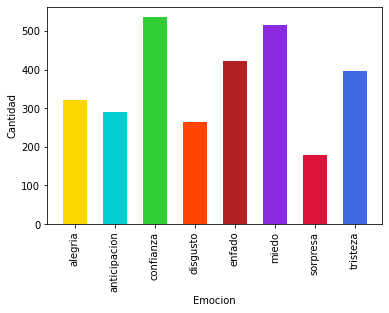

In [180]:
import matplotlib.pyplot as plt

emocion = ['alegria', 'anticipacion', 'confianza', 'disgusto', 'enfado', 'miedo', 'sorpresa', 'tristeza']
cantidad = [strValores.count('alegria'), strValores.count('anticipacion'), strValores.count('confianza'), strValores.count('disgusto'), strValores.count('enfado'), strValores.count('miedo'), strValores.count('sorpresa'), strValores.count('tristeza')]
 
#Se crea el diagrama de barras
plt.bar(emocion, cantidad, width=0.6, color= ['gold','darkturquoise','limegreen', 'orangered', 'firebrick', 'blueviolet', 'crimson', 'royalblue'])
plt.xticks(rotation= 90)

plt.ylabel('Cantidad')
plt.xlabel('Emocion')
plt.show()

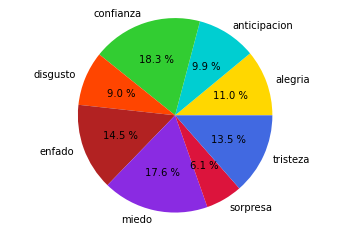

In [182]:
#Se crea el diagrama de sectores
plt.pie(cantidad, labels=emocion, autopct="%0.1f %%", colors= ['gold','darkturquoise','limegreen', 'orangered', 'firebrick', 'blueviolet', 'crimson', 'royalblue'])
plt.axis("equal")
plt.show()